
*Title: Predicting the Severity Level of Dry Eye Disease (DED) in Individuals.*
-

**Objective:**

Dry Eye Disease (DED) is a common condition affecting millions of individuals worldwide, leading to discomfort, irritation, and potential vision problems. The severity of DED varies significantly from one person to another, making personalized diagnosis and treatment crucial for effective management.

The objective of this project is to predict the severity level of Dry Eye Disease (DED) in individuals based on a set of medical, behavioral, and demographic features. By accurately classifying the severity of DED (e.g., mild, moderate, severe, normal), healthcare providers can optimize treatment strategies and improve patient outcomes.

**Target Variable:**

The target variable for this project is the DED severity level, which can be categorized into distinct classes (e.g., mild, moderate, severe, normal). This target variable will depend on factors such as clinical measurements (e.g., tear break-up time (TBUT), Schirmer test, OSDI), and demographic information.

**Goal:**

The goal is to develop a robust predictive model capable of classifying individuals into appropriate DED severity categories. The model should be interpretable, reliable, and applicable in a clinical setting, enabling healthcare professionals to make data-driven decisions for patient management and care.


#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement
- This project understands how the Patient's Eye condition (ded_diagnosis = DED or NON DED ) is affected by other variables such as osdi_total_score, schirmer_test_left_eye, schirmer_test_right_eye, tbut_left_eye, tbut_right_eye, ocular_surface_staining_left_eye, ocular_surface_staining_right_eye, ded_severity

- DED - Dry Eye Deficiency (Cases)
- Non DED - Non Dry Eye Deficiency (Controls)

### 2) Data Collection
- Dataset Source - Data is collected from Eye hospital. 
- The data 1 contains all the records of DED people, consists of 20 column and 350 rows.
- The dataset 2 contains all the records of NON DED people, consists of 16 columns and 350 rows.

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Import the CSV Data as Pandas DataFrame

In [ ]:
ded_df = pd.read_excel('data/DED_OSDI_Study(cases).xlsx')
ded_df

Name  Participant ID  Age  Gender  \
0     Ishaan Reddy               1   17  Female   
1      Meera Verma               2   22  Female   
2      Meera Patel               3   24  Female   
3       Meera Nair               4   16  Female   
4      Arjun Gupta               5   21    Male   
..             ...             ...  ...     ...   
345     Aarav Nair             346   15    Male   
346    Anika Singh             347   21    Male   
347     Aanya Nair             348   15    Male   
348  Krishna Singh             349   22    Male   
349    Ishaan Nair             350   26  Female   

                      Device Types Used  Average Daily Usage (hours)  \
0                  Smartphone, Computer                            5   
1                    Tablet, Smartphone                            8   
2                  Smartphone, Computer                            4   
3    Gaming Console, Smartphone, Tablet                            7   
4                    Tablet, Smartphone                            4   
..                                  ...                          ...   
345  Gaming Console, Smartphone, Tablet                            9   
346                Smartphone, Computer                            5   
347  Gaming Console, Smartphone, Tablet                            7   
348                  Tablet, Smartphone                            4   
349                Smartphone, Computer                           10   

     Years of Digital Device Usage DED Diagnosis (Yes/No)  Diagnosis Date  \
0                               11                    Yes            2023   
1                                1                    Yes            2023   
2                                4                    Yes            2023   
3                               10                    Yes            2023   
4                                1                    Yes            2023   
..                             ...                    ...             ...   
345                              4                    Yes            2023   
346                              8                    Yes            2023   
347                              8                    Yes            2023   
348                              8                    Yes            2023   
349                              1                    Yes            2023   

             Symptoms Treatment (If diagnosed)  \
0    Dry eye symptoms         Artificial Tears   
1    Dry eye symptoms         Artificial Tears   
2    Dry eye symptoms         Artificial Tears   
3    Dry eye symptoms         Artificial Tears   
4    Dry eye symptoms         Artificial Tears   
..                ...                      ...   
345  Dry eye symptoms         Artificial Tears   
346  Dry eye symptoms         Artificial Tears   
347  Dry eye symptoms         Artificial Tears   
348  Dry eye symptoms         Artificial Tears   
349  Dry eye symptoms         Artificial Tears   

    Control Group Symptoms (Yes/No)  OSDI Total Score  \
0                                No         64.583333   
1                                No         83.333333   
2                                No         91.666667   
3                                No         72.916667   
4                                No         87.500000   
..                              ...               ...   
345                              No         89.583333   
346                              No        106.250000   
347                              No         72.916667   
348                              No         83.333333   
349                              No         83.333333   

     Schirmer Test (Left Eye)  Schirmer Test (Right Eye)  TBUT (Left Eye)  \
0                           1                          5                1   
1                           2                          0                2   
2                           1                          2                2   
3                

In [ ]:
non_ded_df = pd.read_excel('data/Non_DED_OSDI_Study(contros).xlsx')
non_ded_df

Participant ID         Name  Age  Gender  \
0                 1  Sneha Joshi   20    Male   
1                 2    Neha Nair   12  Female   
2                 3   Diya Joshi   18  Female   
3                 4   Diya Patel   21  Female   
4                 5  Arjun Yadav   22  Female   
..              ...          ...  ...     ...   
345             346     Neha Rao   23  Female   
346             347  Ishaan Iyer   20  Female   
347             348   Neha Menon   21  Female   
348             349     Ravi Das   22  Female   
349             350  Priya Menon   13  Female   

                      Device Types Used  Average Daily Usage (hours)  \
0                  Smartphone, Computer                           10   
1                    Tablet, Smartphone                            5   
2                  Smartphone, Computer                            8   
3    Gaming Console, Smartphone, Tablet                            6   
4    Gaming Console, Smartphone, Tablet                            2   
..                                  ...                          ...   
345                Smartphone, Computer                            6   
346                Smartphone, Computer                            8   
347                Smartphone, Computer                            8   
348                Smartphone, Computer                            8   
349  Gaming Console, Smartphone, Tablet                            7   

     Years of Digital Device Usage DED Diagnosis (Yes/No)  \
0                               12                     No   
1                                3                     No   
2                                7                     No   
3                               11                     No   
4                               10                     No   
..                             ...                    ...   
345                              9                     No   
346                             12                     No   
347                              5                     No   
348                             11                     No   
349                              6                     No   

     Schirmer Test (Left Eye)  Schirmer Test (Right Eye)  TBUT (Left Eye)  \
0                          13                         11               13   
1                          14                         10               13   
2                          13                         15               15   
3                          15                         14               15   
4                          13                         15               14   
..                        ...                        ...              ...   
345                        12                         10               11   
346                        13                         11               14   
347                        11                         12               12   
348                        13                         13               12   
349                        11                         13               14   

     TBUT (Right Eye)  Ocular Surface Staining (Left Eye)  \
0                  14                                   0   
1                  12                                   0   
2                  11                                   0   
3                  13                                   0   
4                  14                                   0   
..                ...                                 ...   
345                12                                   0   
346                12                                   0   
347                14                                   0   
348                14                                   0   
349                15                                   0   

     Ocular Surface Staining (Right Eye)  OSDI Total Score  DED Severity  
0                                      0             10.03           NaN  
1         

### 2.2 Dataset information

 
- age : 12 - 30 years
- gender : sex of person -> (Male/Female)
- device types used : ['Gaming Console, Smartphone, Tablet', 'Smartphone, Computer', 'Tablet, Smartphone']
- average_daily_usage_hours :  [2, 3, 4, 5, 6, 7, 8, 9, 10]
- years_of_digital_device_usage :  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
- ded_diagnosis : Person is diagnosied or not -> (Yes/No)
- osdi_total_score : (Ocular Surface Density Index) = continuous data
- schirmer_test_left_eye : [0, 1, 2, 3, 4, 5, 10, 11, 12, 13, 14, 15]
- schirmer_test_right_eye : [0, 1, 2, 3, 4, 5, 10, 11, 12, 13, 14, 15]
- tbut_left_eye (TBUT - tear break-up time ) : [0, 1, 2, 3, 4, 5, 10, 11, 12, 13, 14, 15]
- tbut_right_eye (TBUT - tear break-up time ): [0, 1, 2, 3, 4, 5, 10, 11, 12, 13, 14, 15]
- ocular_surface_staining_left_eye : [0, 1, 2, 3]
- ocular_surface_staining_right_eye : [0, 1, 2, 3]
- ded_severity : Severity level -> (Mild, Moderate, Severe, Normal)



### 3. Data Checks to perform

- Check Duplicates
- Check Missing values
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Duplicates

In [44]:
ded_df[ded_df.duplicated()]

Empty DataFrame
Columns: [Name, Participant ID, Age, Gender, Device Types Used, Average Daily Usage (hours), Years of Digital Device Usage, DED Diagnosis (Yes/No), Diagnosis Date, Symptoms, Treatment (If diagnosed), Control Group Symptoms (Yes/No), OSDI Total Score, Schirmer Test (Left Eye), Schirmer Test (Right Eye), TBUT (Left Eye), TBUT (Right Eye), Ocular Surface Staining (Left Eye), Ocular Surface Staining (Right Eye), DED Severity]
Index: []

In [45]:
non_ded_df[non_ded_df.duplicated()]

Empty DataFrame
Columns: [Participant ID, Name, Age, Gender, Device Types Used, Average Daily Usage (hours), Years of Digital Device Usage, DED Diagnosis (Yes/No), Schirmer Test (Left Eye), Schirmer Test (Right Eye), TBUT (Left Eye), TBUT (Right Eye), Ocular Surface Staining (Left Eye), Ocular Surface Staining (Right Eye), OSDI Total Score, DED Severity]
Index: []

### 3.2 Check Missing values

In [46]:
ded_df.isna().sum()

Name                                   0
Participant ID                         0
Age                                    0
Gender                                 0
Device Types Used                      0
Average Daily Usage (hours)            0
Years of Digital Device Usage          0
DED Diagnosis (Yes/No)                 0
Diagnosis Date                         0
Symptoms                               0
Treatment (If diagnosed)               0
Control Group Symptoms (Yes/No)        0
OSDI Total Score                       0
Schirmer Test (Left Eye)               0
Schirmer Test (Right Eye)              0
TBUT (Left Eye)                        0
TBUT (Right Eye)                       0
Ocular Surface Staining (Left Eye)     0
Ocular Surface Staining (Right Eye)    0
DED Severity                           0
dtype: int64

Observation :
- No missing values in the dataset

In [47]:
non_ded_df.isna().sum()

Participant ID                           0
Name                                     0
Age                                      0
Gender                                   0
Device Types Used                        0
Average Daily Usage (hours)              0
Years of Digital Device Usage            0
DED Diagnosis (Yes/No)                   0
Schirmer Test (Left Eye)                 0
Schirmer Test (Right Eye)                0
TBUT (Left Eye)                          0
TBUT (Right Eye)                         0
Ocular Surface Staining (Left Eye)       0
Ocular Surface Staining (Right Eye)      0
OSDI Total Score                         0
DED Severity                           350
dtype: int64

**Observation :**
- We have total null values in the DED Severity
- We are going to fill it with 'Normal'


In [48]:
df = pd.concat([ded_df, non_ded_df],ignore_index=True)
df

Name  Participant ID  Age  Gender  \
0    Ishaan Reddy               1   17  Female   
1     Meera Verma               2   22  Female   
2     Meera Patel               3   24  Female   
3      Meera Nair               4   16  Female   
4     Arjun Gupta               5   21    Male   
..            ...             ...  ...     ...   
695      Neha Rao             346   23  Female   
696   Ishaan Iyer             347   20  Female   
697    Neha Menon             348   21  Female   
698      Ravi Das             349   22  Female   
699   Priya Menon             350   13  Female   

                      Device Types Used  Average Daily Usage (hours)  \
0                  Smartphone, Computer                            5   
1                    Tablet, Smartphone                            8   
2                  Smartphone, Computer                            4   
3    Gaming Console, Smartphone, Tablet                            7   
4                    Tablet, Smartphone                            4   
..                                  ...                          ...   
695                Smartphone, Computer                            6   
696                Smartphone, Computer                            8   
697                Smartphone, Computer                            8   
698                Smartphone, Computer                            8   
699  Gaming Console, Smartphone, Tablet                            7   

     Years of Digital Device Usage DED Diagnosis (Yes/No)  Diagnosis Date  \
0                               11                    Yes          2023.0   
1                                1                    Yes          2023.0   
2                                4                    Yes          2023.0   
3                               10                    Yes          2023.0   
4                                1                    Yes          2023.0   
..                             ...                    ...             ...   
695                              9                     No             NaN   
696                             12                     No             NaN   
697                              5                     No             NaN   
698                             11                     No             NaN   
699                              6                     No             NaN   

             Symptoms Treatment (If diagnosed)  \
0    Dry eye symptoms         Artificial Tears   
1    Dry eye symptoms         Artificial Tears   
2    Dry eye symptoms         Artificial Tears   
3    Dry eye symptoms         Artificial Tears   
4    Dry eye symptoms         Artificial Tears   
..                ...                      ...   
695               NaN                      NaN   
696               NaN                      NaN   
697               NaN                      NaN   
698               NaN                      NaN   
699               NaN                      NaN   

    Control Group Symptoms (Yes/No)  OSDI Total Score  \
0                                No         64.583333   
1                                No         83.333333   
2                                No         91.666667   
3                                No         72.916667   
4                                No         87.500000   
..                              ...               ...   
695                             NaN          1.960000   
696                             NaN          1.020000   
697                             NaN          0.590000   
698                             NaN          6.130000   
699                             NaN          2.780000   

     Schirmer Test (Left Eye)  Schirmer Test (Right Eye)  TBUT (Left Eye)  \
0                           1                          5                1   
1                           2                          0                2   
2                           1                          2                2   
3                           

### 3.3 Check data types

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Name                                 700 non-null    object 
 1   Participant ID                       700 non-null    int64  
 2   Age                                  700 non-null    int64  
 3   Gender                               700 non-null    object 
 4   Device Types Used                    700 non-null    object 
 5   Average Daily Usage (hours)          700 non-null    int64  
 6   Years of Digital Device Usage        700 non-null    int64  
 7   DED Diagnosis (Yes/No)               700 non-null    object 
 8   Diagnosis Date                       350 non-null    float64
 9   Symptoms                             350 non-null    object 
 10  Treatment (If diagnosed)             350 non-null    object 
 11  Control Group Symptoms (Yes/No) 

### 3.4 Checking the number of unique values of each column

In [50]:
df.nunique()

Name                                   356
Participant ID                         350
Age                                     19
Gender                                   2
Device Types Used                        3
Average Daily Usage (hours)              9
Years of Digital Device Usage           12
DED Diagnosis (Yes/No)                   2
Diagnosis Date                           1
Symptoms                                 1
Treatment (If diagnosed)                 1
Control Group Symptoms (Yes/No)          1
OSDI Total Score                       332
Schirmer Test (Left Eye)                12
Schirmer Test (Right Eye)               12
TBUT (Left Eye)                         12
TBUT (Right Eye)                        12
Ocular Surface Staining (Left Eye)       4
Ocular Surface Staining (Right Eye)      4
DED Severity                             3
dtype: int64

### 3.5 Check statistics of data set

In [51]:
df.describe()

Participant ID         Age  Average Daily Usage (hours)  \
count      700.000000  700.000000                   700.000000   
mean       175.500000   20.987143                     6.021429   
std        101.108131    5.562351                     2.567732   
min          1.000000   12.000000                     2.000000   
25%         88.000000   16.000000                     4.000000   
50%        175.500000   21.000000                     6.000000   
75%        263.000000   26.000000                     8.000000   
max        350.000000   30.000000                    10.000000   

       Years of Digital Device Usage  Diagnosis Date  OSDI Total Score  \
count                     700.000000           350.0        700.000000   
mean                        6.424286          2023.0         46.196814   
std                         3.424850             0.0         40.955650   
min                         1.000000          2023.0          0.070000   
25%                         3.000000          2023.0          5.757500   
50%                         6.000000          2023.0         37.250000   
75%                         9.000000          2023.0         85.416667   
max                        12.000000          2023.0        110.416667   

       Schirmer Test (Left Eye)  Schirmer Test (Right Eye)  TBUT (Left Eye)  \
count                 700.00000                 700.000000       700.000000   
mean                    7.64000                   7.395714         7.450000   
std                     5.36124                   5.262683         5.292753   
min                     0.00000                   0.000000         0.000000   
25%                     3.00000                   2.000000         2.000000   
50%                     7.50000                   7.500000         7.500000   
75%                    13.00000                  12.000000        12.000000   
max                    15.00000                  15.000000        15.000000   

       TBUT (Right Eye)  Ocular Surface Staining (Left Eye)  \
count        700.000000                          700.000000   
mean           7.554286                            1.000000   
std            5.256366                            1.153461   
min            0.000000                            0.000000   
25%            3.000000                            0.000000   
50%            7.500000                            0.500000   
75%           13.000000                            2.000000   
max           15.000000                            3.000000   

       Ocular Surface Staining (Right Eye)  
count                           700.000000  
mean                              0.982857  
std                               1.143367  
min                               0.000000  
25%                               0.000000  
50%                               0.500000  
75%                               2.000000  
max                               3.000000

#### Insight
- From above description of numerical data, all means are very close to each other - between 66 and 68.05;
- All standard deviations are also close - between 14.6 and 15.19;
- While there is a minimum score  0 for math, for writing minimum is much higher = 10 and for reading more higher = 17

---- 

- From above description of numerical data, mean values are closer to each other in few columns - between 0.9 - 1.0, 6.0 - 6.5 , 7.3 - 7.6, 20.9, 46.19
- All standard deviations are also close - between 1.0 - 5.6 , 40.95
- Most of the columns have minimum value = 0

### 3.7 Exploring Data

In [52]:
df.head()

Name  Participant ID  Age  Gender  \
0  Ishaan Reddy               1   17  Female   
1   Meera Verma               2   22  Female   
2   Meera Patel               3   24  Female   
3    Meera Nair               4   16  Female   
4   Arjun Gupta               5   21    Male   

                    Device Types Used  Average Daily Usage (hours)  \
0                Smartphone, Computer                            5   
1                  Tablet, Smartphone                            8   
2                Smartphone, Computer                            4   
3  Gaming Console, Smartphone, Tablet                            7   
4                  Tablet, Smartphone                            4   

   Years of Digital Device Usage DED Diagnosis (Yes/No)  Diagnosis Date  \
0                             11                    Yes          2023.0   
1                              1                    Yes          2023.0   
2                              4                    Yes          2023.0   
3                             10                    Yes          2023.0   
4                              1                    Yes          2023.0   

           Symptoms Treatment (If diagnosed) Control Group Symptoms (Yes/No)  \
0  Dry eye symptoms         Artificial Tears                              No   
1  Dry eye symptoms         Artificial Tears                              No   
2  Dry eye symptoms         Artificial Tears                              No   
3  Dry eye symptoms         Artificial Tears                              No   
4  Dry eye symptoms         Artificial Tears                              No   

   OSDI Total Score  Schirmer Test (Left Eye)  Schirmer Test (Right Eye)  \
0         64.583333                         1                          5   
1         83.333333                         2                          0   
2         91.666667                         1                          2   
3         72.916667                         0                          5   
4         87.500000                         2                          3   

   TBUT (Left Eye)  TBUT (Right Eye)  Ocular Surface Staining (Left Eye)  \
0                1                 4                                   3   
1                2                 1                                   3   
2                2                 5                                   1   
3                4                 1                                   1   
4                3                 1                                   3   

   Ocular Surface Staining (Right Eye) DED Severity  
0                                    2     Moderate  
1                                    1       Severe  
2                                    1     Moderate  
3                                    3         Mild  
4                                    3         Mild

In [53]:
df.columns

Index(['Name', 'Participant ID', 'Age', 'Gender', 'Device Types Used',
       'Average Daily Usage (hours)', 'Years of Digital Device Usage',
       'DED Diagnosis (Yes/No)', 'Diagnosis Date', 'Symptoms',
       'Treatment (If diagnosed)', 'Control Group Symptoms (Yes/No)',
       'OSDI Total Score', 'Schirmer Test (Left Eye)',
       'Schirmer Test (Right Eye)', 'TBUT (Left Eye)', 'TBUT (Right Eye)',
       'Ocular Surface Staining (Left Eye)',
       'Ocular Surface Staining (Right Eye)', 'DED Severity'],
      dtype='object')

In [54]:
df.columns = df.columns.str.strip(' ').str.lower().str.replace(' ', '_').str.replace('(','').str.replace(')','')


In [55]:
df.columns

Index(['name', 'participant_id', 'age', 'gender', 'device_types_used',
       'average_daily_usage_hours', 'years_of_digital_device_usage',
       'ded_diagnosis_yes/no', 'diagnosis_date', 'symptoms',
       'treatment_if_diagnosed', 'control_group_symptoms_yes/no',
       'osdi_total_score', 'schirmer_test_left_eye', 'schirmer_test_right_eye',
       'tbut_left_eye', 'tbut_right_eye', 'ocular_surface_staining_left_eye',
       'ocular_surface_staining_right_eye', 'ded_severity'],
      dtype='object')

In [56]:
columns = [ ]

for column in df.columns:
    columns.append(column.lower().strip(')').replace(' ','_').replace('(', ''))

In [57]:
df.columns

Index(['name', 'participant_id', 'age', 'gender', 'device_types_used',
       'average_daily_usage_hours', 'years_of_digital_device_usage',
       'ded_diagnosis_yes/no', 'diagnosis_date', 'symptoms',
       'treatment_if_diagnosed', 'control_group_symptoms_yes/no',
       'osdi_total_score', 'schirmer_test_left_eye', 'schirmer_test_right_eye',
       'tbut_left_eye', 'tbut_right_eye', 'ocular_surface_staining_left_eye',
       'ocular_surface_staining_right_eye', 'ded_severity'],
      dtype='object')

In [58]:
df['diagnosis_date'].value_counts()

diagnosis_date
2023.0    350
Name: count, dtype: int64

In [59]:
df['symptoms'].value_counts()

symptoms
Dry eye symptoms    350
Name: count, dtype: int64

In [60]:
df['control_group_symptoms_yes/no'].value_counts()

control_group_symptoms_yes/no
No    350
Name: count, dtype: int64

In [61]:
df['treatment_if_diagnosed'].value_counts()

treatment_if_diagnosed
Artificial Tears    350
Name: count, dtype: int64

In [62]:
# filling the missing values -- with Normal
df['ded_severity'].fillna('Normal', inplace=True)

In [63]:
df.rename(columns={'ded_diagnosis_yes/no': 'ded_diagnosis'}, inplace=True)


In [64]:
df.isna().sum()

name                                   0
participant_id                         0
age                                    0
gender                                 0
device_types_used                      0
average_daily_usage_hours              0
years_of_digital_device_usage          0
ded_diagnosis                          0
diagnosis_date                       350
symptoms                             350
treatment_if_diagnosed               350
control_group_symptoms_yes/no        350
osdi_total_score                       0
schirmer_test_left_eye                 0
schirmer_test_right_eye                0
tbut_left_eye                          0
tbut_right_eye                         0
ocular_surface_staining_left_eye       0
ocular_surface_staining_right_eye      0
ded_severity                           0
dtype: int64

In [65]:
# droping the diagnosis_date, symptoms, treatment_if_diagnosed, control_group_symptoms_yes/no    
# diagonsis date is not required

df.drop(labels=['name', 'participant_id','diagnosis_date', 'symptoms', 'treatment_if_diagnosed', 'control_group_symptoms_yes/no' ],axis=1, inplace=True)


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   age                                700 non-null    int64  
 1   gender                             700 non-null    object 
 2   device_types_used                  700 non-null    object 
 3   average_daily_usage_hours          700 non-null    int64  
 4   years_of_digital_device_usage      700 non-null    int64  
 5   ded_diagnosis                      700 non-null    object 
 6   osdi_total_score                   700 non-null    float64
 7   schirmer_test_left_eye             700 non-null    int64  
 8   schirmer_test_right_eye            700 non-null    int64  
 9   tbut_left_eye                      700 non-null    int64  
 10  tbut_right_eye                     700 non-null    int64  
 11  ocular_surface_staining_left_eye   700 non-null    int64  

## Detecting and Handling outliers

In [67]:
df.columns

Index(['age', 'gender', 'device_types_used', 'average_daily_usage_hours',
       'years_of_digital_device_usage', 'ded_diagnosis', 'osdi_total_score',
       'schirmer_test_left_eye', 'schirmer_test_right_eye', 'tbut_left_eye',
       'tbut_right_eye', 'ocular_surface_staining_left_eye',
       'ocular_surface_staining_right_eye', 'ded_severity'],
      dtype='object')

<Axes: >

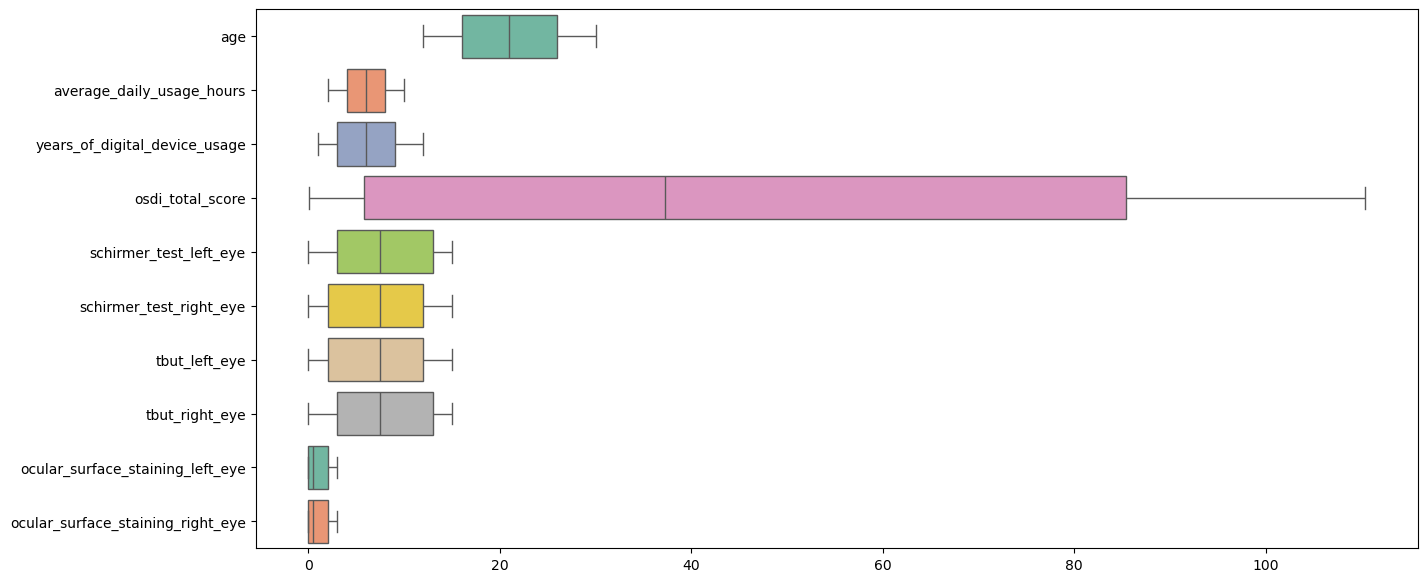

In [68]:
plt.figure(figsize=[15,7])
sns.boxplot(data=df, orient="h", palette="Set2")

**Observation :**

- No outliers found

In [69]:
df.select_dtypes(exclude=['int', 'float'])

gender                   device_types_used ded_diagnosis ded_severity
0    Female                Smartphone, Computer           Yes     Moderate
1    Female                  Tablet, Smartphone           Yes       Severe
2    Female                Smartphone, Computer           Yes     Moderate
3    Female  Gaming Console, Smartphone, Tablet           Yes         Mild
4      Male                  Tablet, Smartphone           Yes         Mild
..      ...                                 ...           ...          ...
695  Female                Smartphone, Computer            No       Normal
696  Female                Smartphone, Computer            No       Normal
697  Female                Smartphone, Computer            No       Normal
698  Female                Smartphone, Computer            No       Normal
699  Female  Gaming Console, Smartphone, Tablet            No       Normal

[700 rows x 4 columns]

In [70]:
df.columns

Index(['age', 'gender', 'device_types_used', 'average_daily_usage_hours',
       'years_of_digital_device_usage', 'ded_diagnosis', 'osdi_total_score',
       'schirmer_test_left_eye', 'schirmer_test_right_eye', 'tbut_left_eye',
       'tbut_right_eye', 'ocular_surface_staining_left_eye',
       'ocular_surface_staining_right_eye', 'ded_severity'],
      dtype='object')

In [71]:
num_features = df.select_dtypes(exclude='object').columns
cat_features = df.select_dtypes(include='object').columns

In [72]:
num_features, cat_features

(Index(['age', 'average_daily_usage_hours', 'years_of_digital_device_usage',
        'osdi_total_score', 'schirmer_test_left_eye', 'schirmer_test_right_eye',
        'tbut_left_eye', 'tbut_right_eye', 'ocular_surface_staining_left_eye',
        'ocular_surface_staining_right_eye'],
       dtype='object'),
 Index(['gender', 'device_types_used', 'ded_diagnosis', 'ded_severity'], dtype='object'))

## 4. EDA 


### Age

#### UNIVARIATE ANALYSIS (what is the distribution of Age ?)

In [73]:
df['age']

0      17
1      22
2      24
3      16
4      21
       ..
695    23
696    20
697    21
698    22
699    13
Name: age, Length: 700, dtype: int64

In [74]:
df['age'].describe()

count    700.000000
mean      20.987143
std        5.562351
min       12.000000
25%       16.000000
50%       21.000000
75%       26.000000
max       30.000000
Name: age, dtype: float64

In [75]:
df[df['age'] == 21]['age'].count()

39

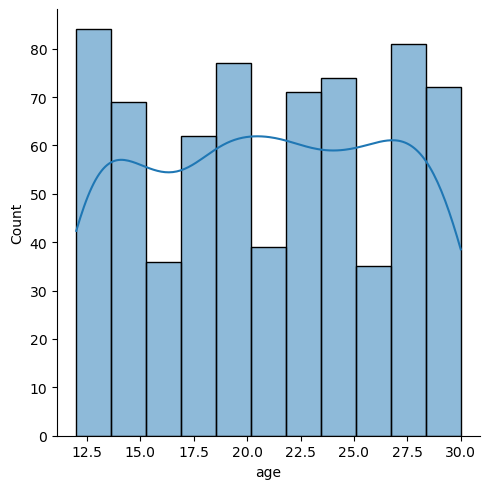

In [76]:
sns.displot(df['age'], kde=True)

#### BIVARIATE ANALYSIS (What is the age distribution for DED vs. NON-DED groups?)

In [77]:
df.groupby(['ded_diagnosis'])['age'].describe()

count       mean       std   min   25%   50%   75%   max
ded_diagnosis                                                          
No             350.0  21.134286  5.525323  12.0  16.0  21.0  26.0  30.0
Yes            350.0  20.840000  5.603171  12.0  16.0  21.0  26.0  30.0

#### Observation :

- There's similar Age distribution between DED & NON DED.
- Average age is also similar between DED & NON DED individuals ( Difference = 0.29)


#### BIVARIATE ANALYSIS (Are there age-related patterns that show higher or lower DED prevalence?)

Is there a correlation between age and the occurrence of DED ?

<Axes: xlabel='age', ylabel='Count'>

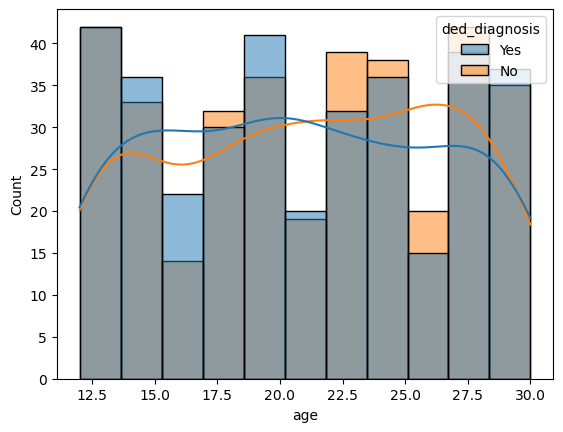

In [78]:
sns.histplot(data=df,x='age' ,kde=True, hue=df['ded_diagnosis'])


#### Observation :

- Individuals with Age below 20 are facing DED and age above 20 are not facing DED

#### BIVARIATE ANALYSIS (What is the Gender distribution with respect to Age ?)

In [79]:
df['age'].describe()

count    700.000000
mean      20.987143
std        5.562351
min       12.000000
25%       16.000000
50%       21.000000
75%       26.000000
max       30.000000
Name: age, dtype: float64

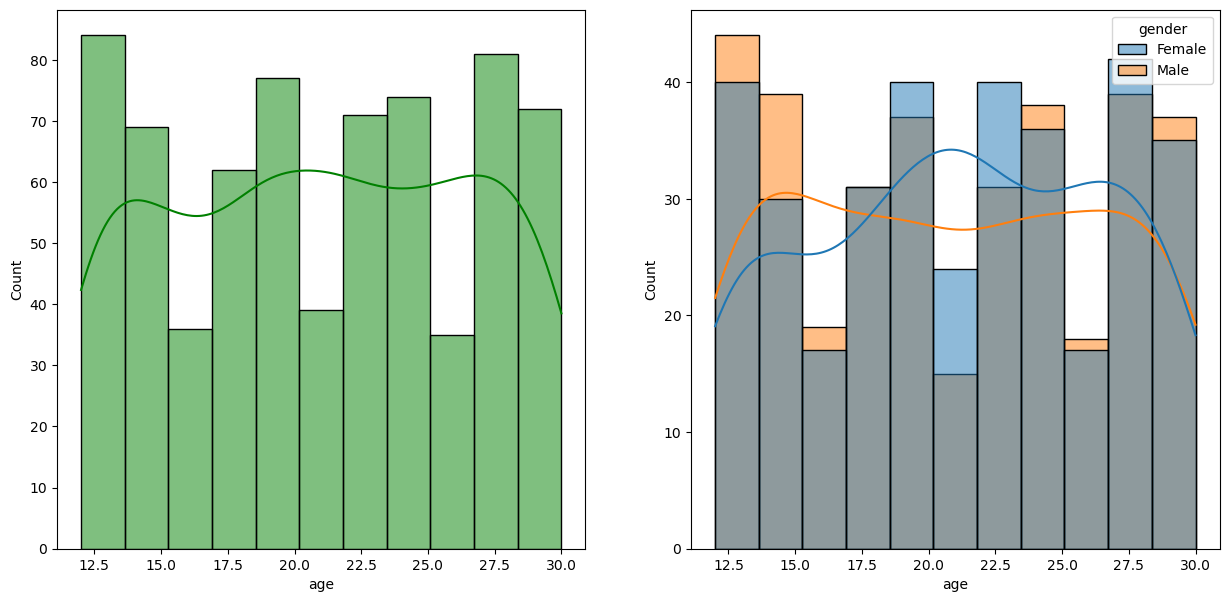

In [80]:
plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='age',kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='age',kde=True,hue='gender' )
plt.show()

#### Observation :

- There are more no.of Males with age below 17.5 years. (12 to 17.5 years)
- There are more no.of females with age above 17.5 years.



### Gender

#### UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

In [81]:
df['gender'].value_counts()

gender
Female    352
Male      348
Name: count, dtype: int64

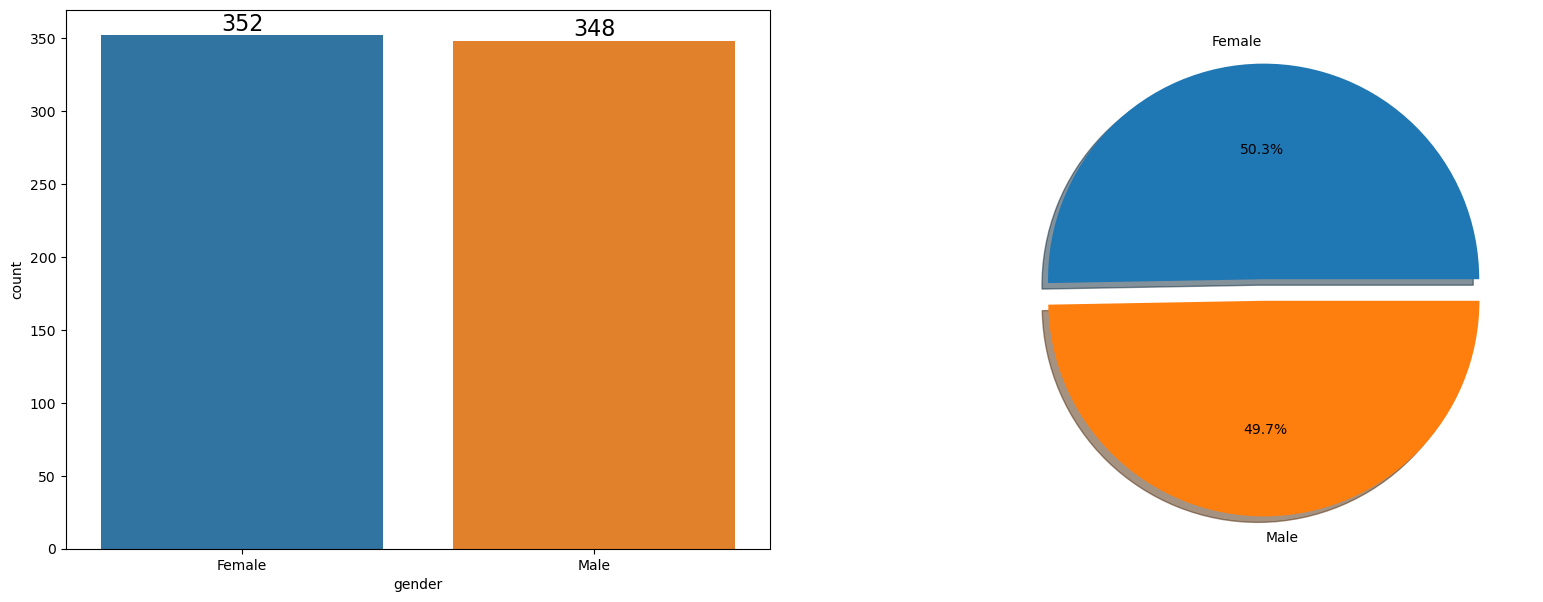

In [82]:
plt.figure(figsize=[20,7])

plt.subplot(121)
ax=sns.countplot(x=df['gender'], hue=df['gender'] )
for container in ax.containers:
    plt.bar_label(container,color='black',size=16)
    
plt.subplot(122)

plt.pie(x=df['gender'].value_counts(),labels=df['gender'].value_counts().keys(),explode=[0,0.1],autopct='%1.1f%%',shadow=True)
plt.show()


#### Observation :

- Proportion of Female and Male are similar
- Females are more by 0.6%


#### BIVARIATE ANALYSIS (Is there a gender imbalance between DED and NON-DED cases? (e.g., more females in DED?) )

In [83]:
df.loc[:,['gender','ded_diagnosis']].value_counts()

gender  ded_diagnosis
Female  Yes              177
        No               175
Male    No               175
        Yes              173
Name: count, dtype: int64

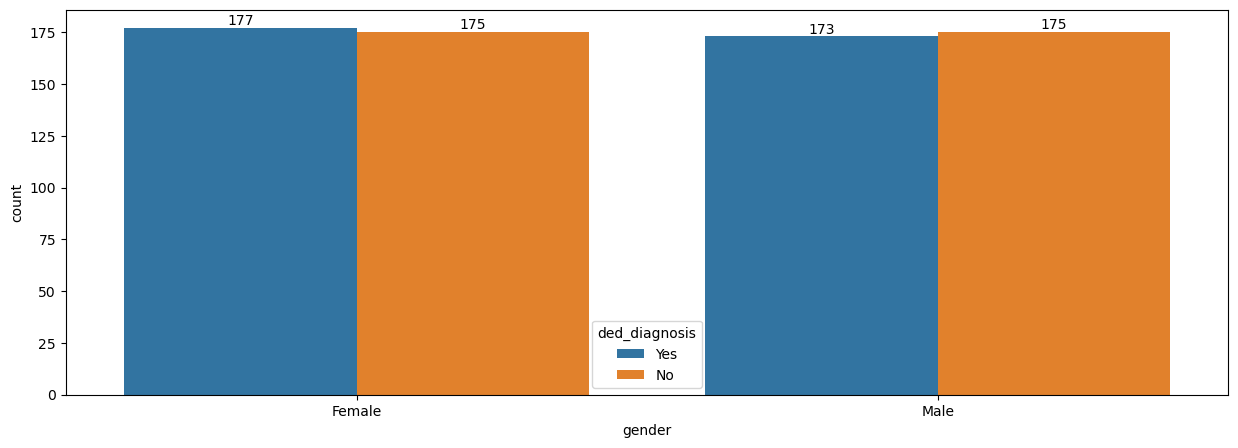

In [84]:
plt.figure(figsize=[15,5])

ax=sns.countplot(x=df['gender'], hue=df['ded_diagnosis'])
for container in ax.containers:
    ax.bar_label(container)
 
plt.show()

#### Observation :
- There are 4 more females in DED 


#### BIVARAITE ANALYSIS (Relationship between Gender and ded severity)

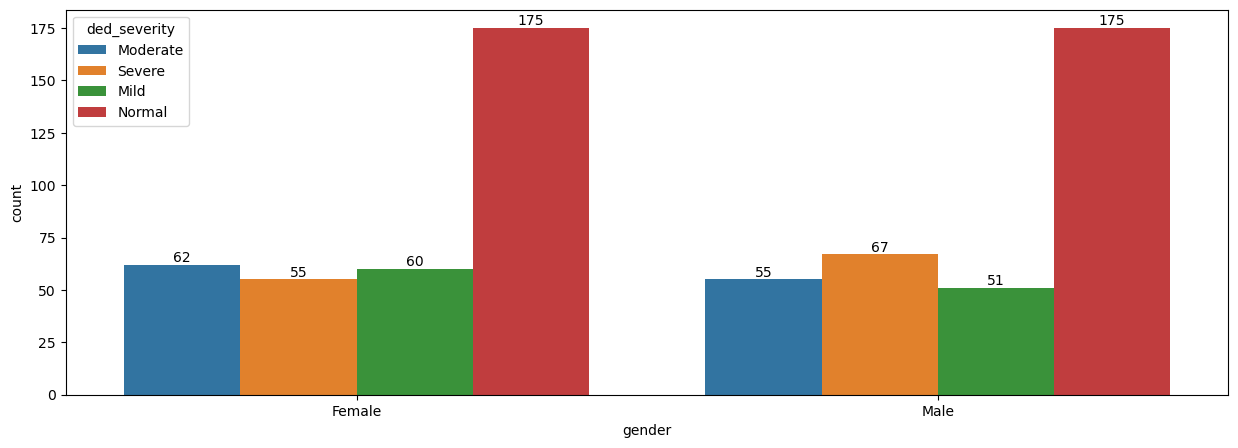

In [85]:
plt.figure(figsize=[15,5])

ax=sns.countplot(x=df['gender'], hue=df['ded_severity'])
for container in ax.containers:
    ax.bar_label(container)
 
plt.show()

In [86]:
df.columns

Index(['age', 'gender', 'device_types_used', 'average_daily_usage_hours',
       'years_of_digital_device_usage', 'ded_diagnosis', 'osdi_total_score',
       'schirmer_test_left_eye', 'schirmer_test_right_eye', 'tbut_left_eye',
       'tbut_right_eye', 'ocular_surface_staining_left_eye',
       'ocular_surface_staining_right_eye', 'ded_severity'],
      dtype='object')

### device types used

#### UNIVARIATE ANALYSIS (What is the distribution of Device Types Used ?)

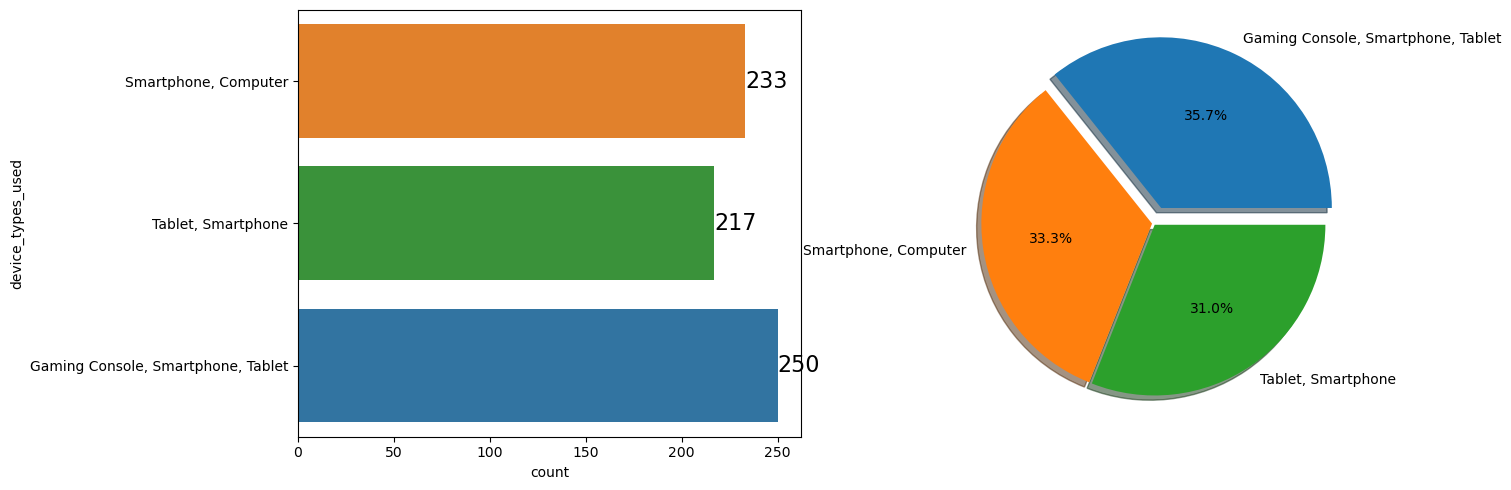

In [87]:
plt.subplots(1,2,figsize=[15,5])

plt.subplot(121)
ax = sns.countplot(y=df['device_types_used'], hue=df['device_types_used'], hue_order=df['device_types_used'].value_counts().keys())
for container in ax.containers:
    plt.bar_label(container, color='black', size=16)

plt.subplot(122)
plt.pie(df['device_types_used'].value_counts(), labels=df['device_types_used'].value_counts().keys(),explode=[0.1 ,0.01, 0.01],autopct='%1.1f%%',shadow=True )

plt.tight_layout()
plt.show()

#### Observation :

- More No.of individuals are using Gaming Console, Smartphone, Tablet : 35.7%


#### BIVARIATE ANALYSIS (What is the distribution of device_types_used (e.g., mobile, laptop, tablet) for DED and NON-DED groups?)

In [88]:
pd.crosstab(index=df['device_types_used'], columns=df['ded_diagnosis']).transpose()

device_types_used  Gaming Console, Smartphone, Tablet  Smartphone, Computer  \
ded_diagnosis                                                                 
No                                                120                   132   
Yes                                               130                   101   

device_types_used  Tablet, Smartphone  
ded_diagnosis                          
No                                 98  
Yes                               119

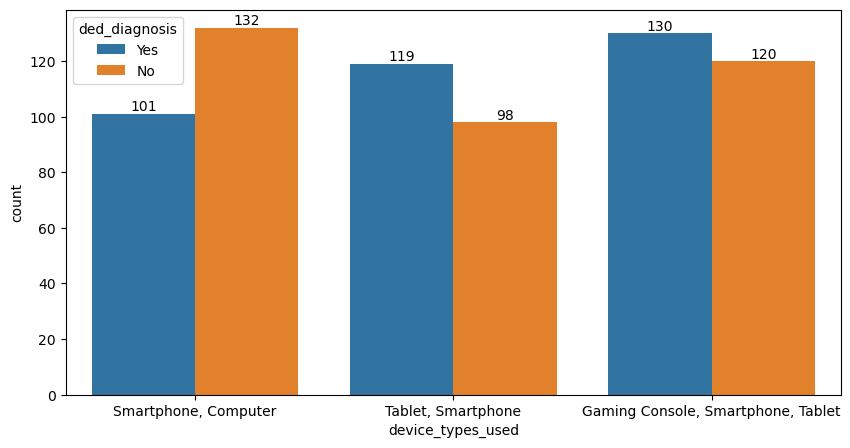

In [89]:
plt.figure(figsize=[10,5])

ax = sns.countplot(x=df['device_types_used'], hue=df['ded_diagnosis'])
for container in ax.containers:
    plt.bar_label(container)
 

####  Observation : 

- More individuals are diagnosed while using Gaming Console, Smartphone, Tablet.
- Next, with Tablet, smartphone. And finally with smartphone, computer.

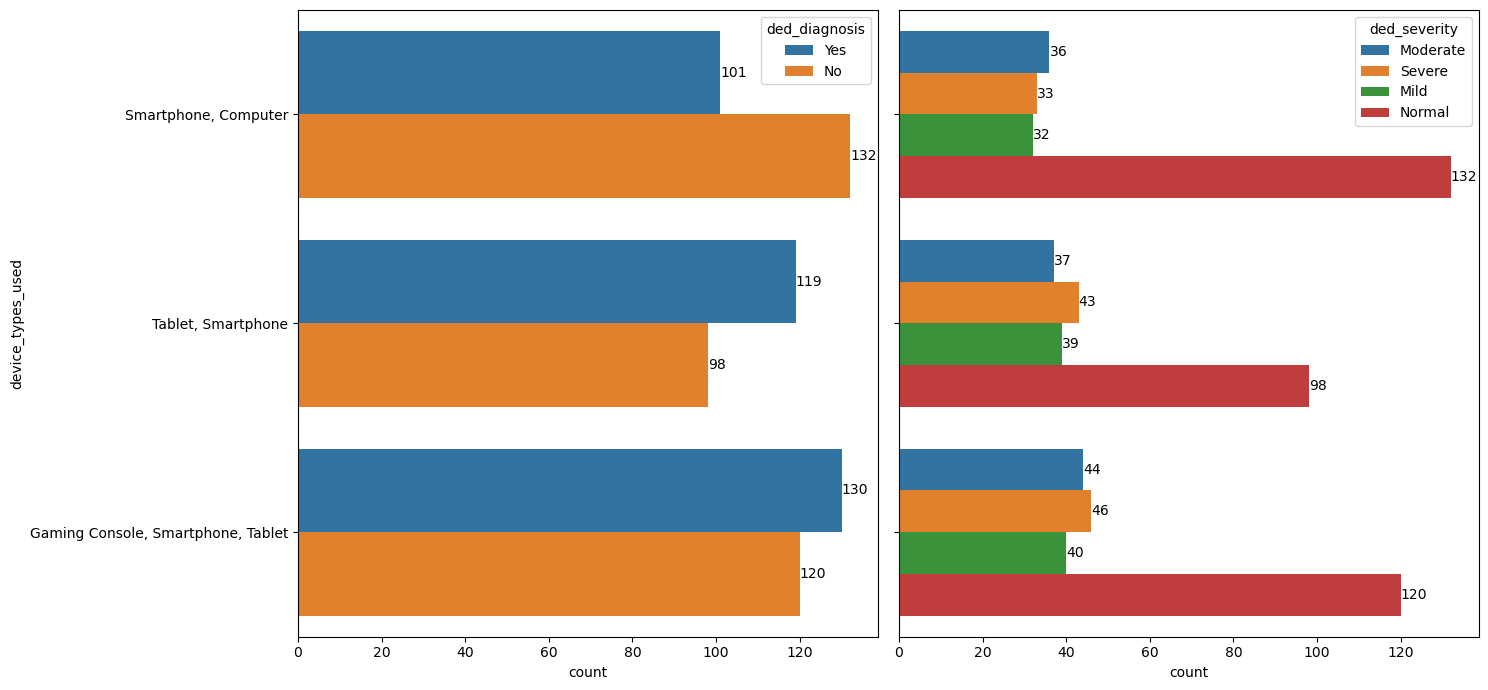

In [90]:
plt.subplots(1,2,figsize=[15,7], sharey=True)

plt.subplot(121)
ax = sns.countplot(y=df['device_types_used'], hue=df['ded_diagnosis'])
for container in ax.containers:
    plt.bar_label(container)
 
plt.subplot(122)
ax = sns.countplot(y=df['device_types_used'], hue=df['ded_severity'])
for container in ax.containers:
    plt.bar_label(container)

plt.tight_layout()

### average daily usage hours

#### UNIVARIATE ANALYSIS (What is the distribution of average daily usage hours ?)

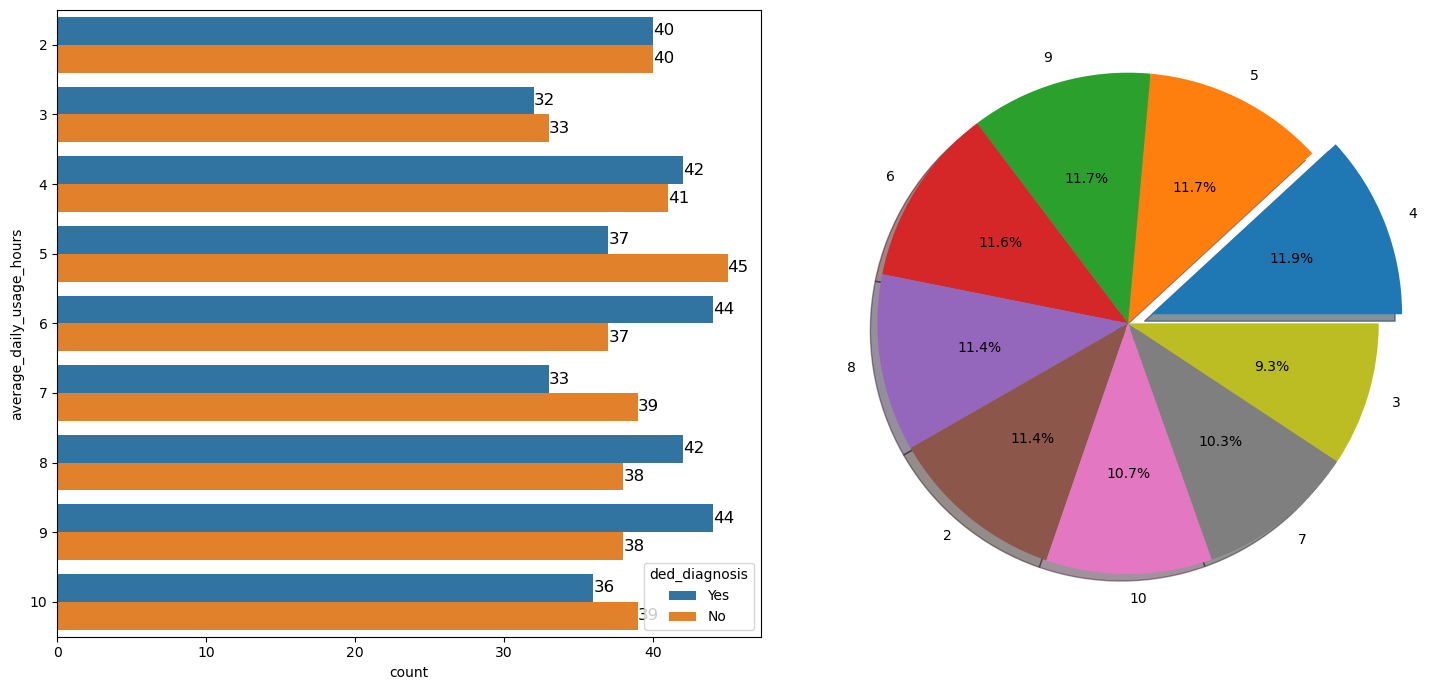

In [171]:
plt.subplots(1,2,figsize=[15,7])

plt.subplot(121)
ax = sns.countplot(y=df['average_daily_usage_hours'], hue=df['ded_diagnosis'] )
for container in ax.containers:
    plt.bar_label(container, color='black', size=12)

plt.subplot(122)
plt.pie(df['average_daily_usage_hours'].value_counts(), labels=df['average_daily_usage_hours'].value_counts().keys() 
        ,autopct='%1.1f%%',shadow=True, explode=[0.1,0,0,0,0,0,0,0,0] )

plt.tight_layout()
plt.show()

#### observation :
- More no.of diagnosied individuals are using 2,4, 6, 8, 9 hours
- Diagonised count of individuals is greater than 40 

#### BIVARAITE ANALYSIS (Is there any correlation between average_daily_usage_hours and DED diagnosis?)

In [92]:
df['average_daily_usage_hours'].nunique()

9

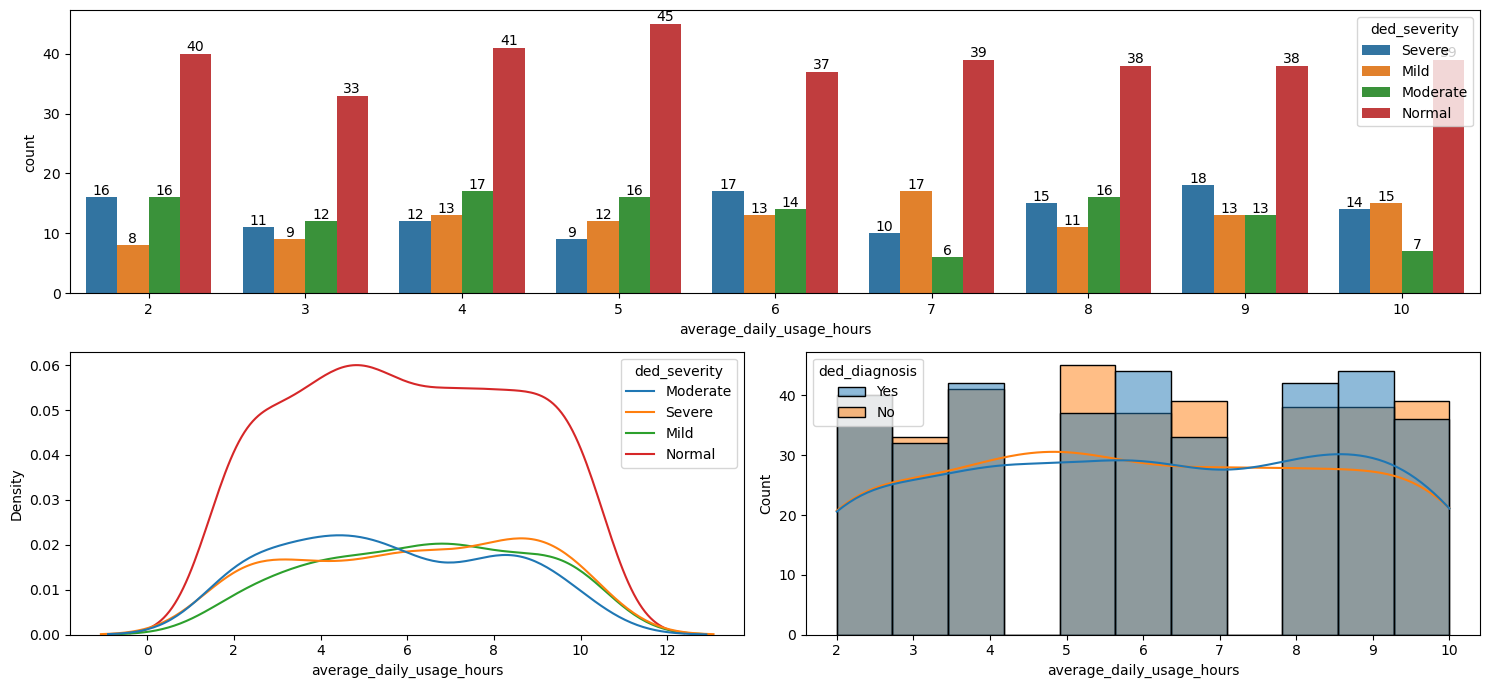

In [170]:
plt.figure(figsize=[15,7])

plt.subplot(211)
ax=sns.countplot(x=df['average_daily_usage_hours'], hue=df['ded_severity'] )
for container in ax.containers:
    plt.bar_label(container)

plt.subplot(223)
sns.kdeplot(x=df['average_daily_usage_hours'] ,  hue=df['ded_severity'] )

plt.subplot(224)
sns.histplot(x=df['average_daily_usage_hours'], hue=df['ded_diagnosis'], kde=True )

plt.tight_layout()

#### Observation :

- There is No proper correlation between average daily usage hours and Ded severity

### years of digital device usage

#### UNIVARIATE ANALYSIS (What is the distribution of years of digital device usage ?)

In [94]:
df['years_of_digital_device_usage'].value_counts()

years_of_digital_device_usage
5     72
7     65
9     64
3     63
11    62
1     59
2     58
6     57
10    55
12    51
4     49
8     45
Name: count, dtype: int64

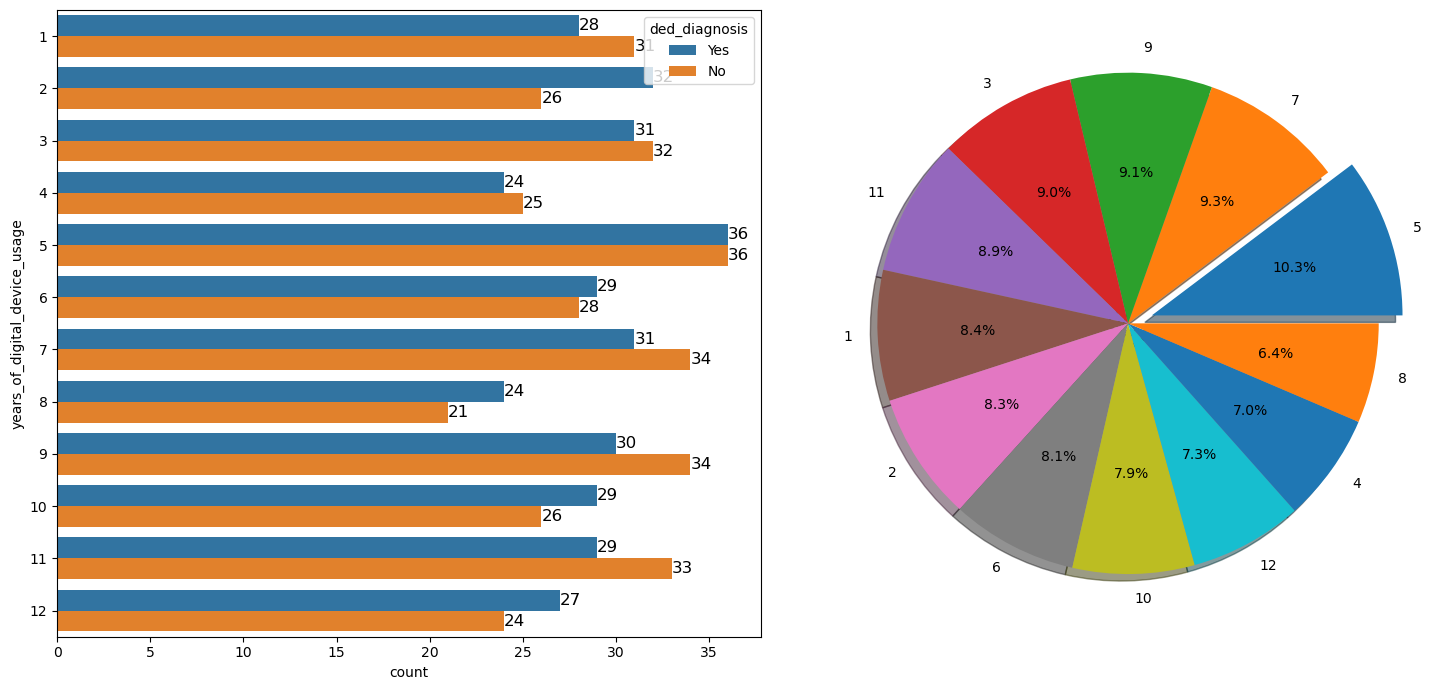

In [169]:
plt.subplots(1,2,figsize=[15,7])

plt.subplot(121)
ax = sns.countplot(y=df['years_of_digital_device_usage'], hue=df['ded_diagnosis'] )
for container in ax.containers:
    plt.bar_label(container, color='black', size=12)

plt.subplot(122)
plt.pie(df['years_of_digital_device_usage'].value_counts(), labels=df['years_of_digital_device_usage'].value_counts().keys(),
        autopct='%1.1f%%',shadow=True, explode=[0.1,0,0,0,0,0,0,0,0,0,0,0] )

plt.tight_layout()
plt.show()


#### Observation :

- More people are using device from 5 years
- Almost all people are using mobile in above 8% irrespective of years of digital device usage
  

#### BINVARIATE ANALYSIS (How do years_of_digital_device_usage vary between DED and NON-DED individuals?)

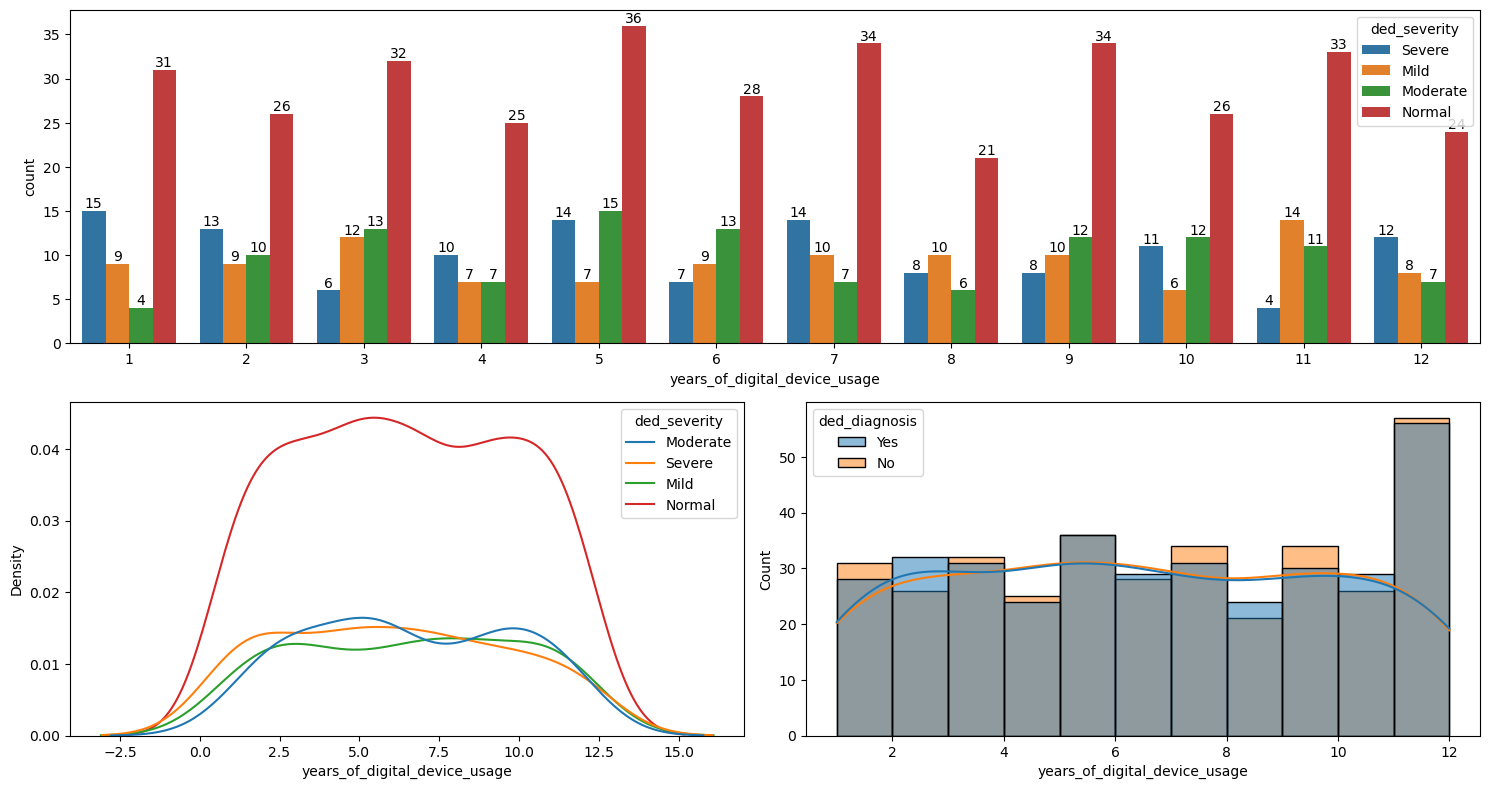

In [96]:
plt.figure(figsize=[15,8])

plt.subplot(211)
ax=sns.countplot(x=df['years_of_digital_device_usage'], hue=df['ded_severity'] )
for container in ax.containers:
    plt.bar_label(container)

plt.subplot(223)
sns.kdeplot(x=df['years_of_digital_device_usage'] ,  hue=df['ded_severity'] )

plt.subplot(224)
sns.histplot(x=df['years_of_digital_device_usage'], hue=df['ded_diagnosis'], kde=True )

plt.tight_layout()

#### Observation :

- There is No proper correlation between years of digital device usage and Ded severity

### ded diagnosis

#### UNIVARIATE ANALYSIS (What is the distribution of the ded_diagnosis (DED vs. NON-DED)?)

In [97]:
df['ded_diagnosis'].value_counts()

ded_diagnosis
Yes    350
No     350
Name: count, dtype: int64

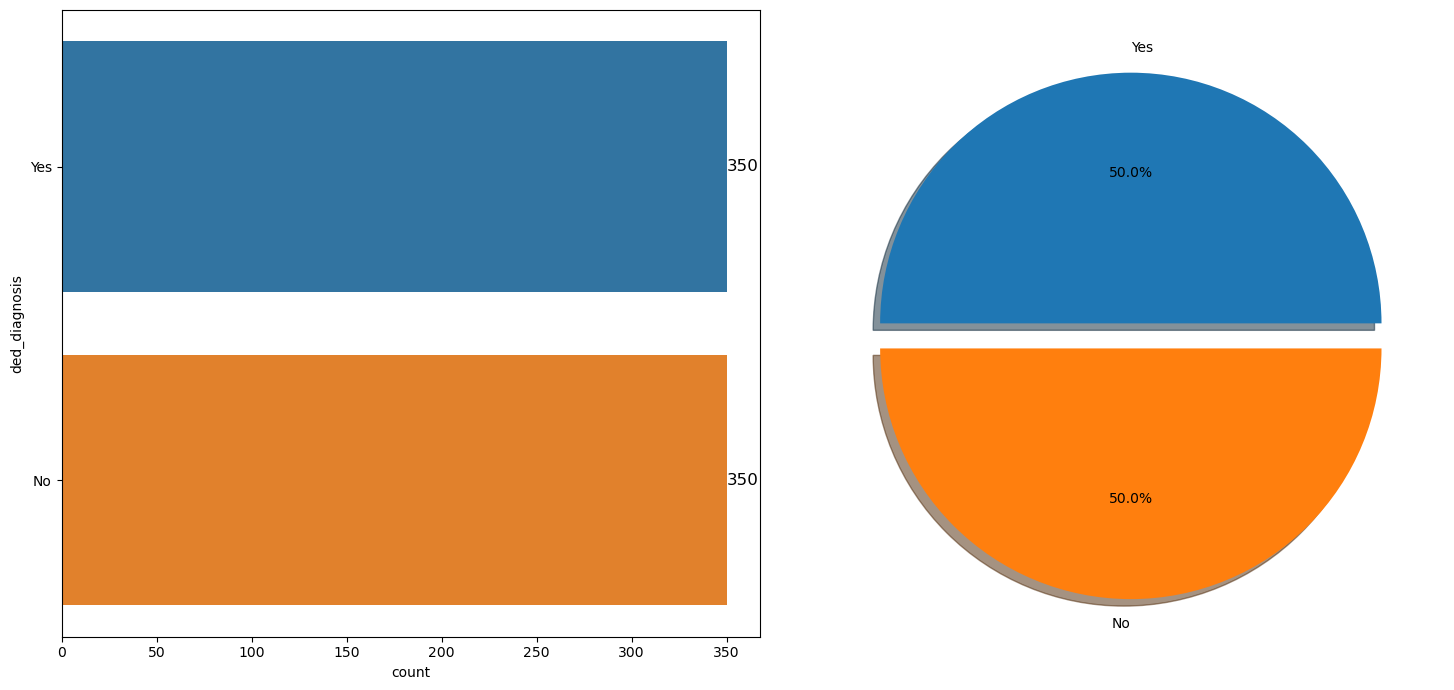

In [98]:
plt.subplots(1,2,figsize=[15,7])

plt.subplot(121)
ax = sns.countplot(y=df['ded_diagnosis'], hue=df['ded_diagnosis'] )
for container in ax.containers:
    plt.bar_label(container, color='black', size=12)

plt.subplot(122)
plt.pie(df['ded_diagnosis'].value_counts(), labels=df['ded_diagnosis'].value_counts().keys(),
        explode=[0,0.1],
        autopct='%1.1f%%',shadow=True )

plt.tight_layout()
plt.show()


In [99]:
df['ded_diagnosis'] == 'Yes'

0       True
1       True
2       True
3       True
4       True
       ...  
695    False
696    False
697    False
698    False
699    False
Name: ded_diagnosis, Length: 700, dtype: bool

In [100]:
df.iloc[349:352]

age  gender     device_types_used  average_daily_usage_hours  \
349   26  Female  Smartphone, Computer                         10   
350   20    Male  Smartphone, Computer                         10   
351   12  Female    Tablet, Smartphone                          5   

     years_of_digital_device_usage ded_diagnosis  osdi_total_score  \
349                              1           Yes         83.333333   
350                             12            No         10.030000   
351                              3            No          9.090000   

     schirmer_test_left_eye  schirmer_test_right_eye  tbut_left_eye  \
349                       4                        4              3   
350                      13                       11             13   
351                      14                       10             13   

     tbut_right_eye  ocular_surface_staining_left_eye  \
349               2                                 3   
350              14                                 0   
351              12                                 0   

     ocular_surface_staining_right_eye ded_severity  
349                                  1         Mild  
350                                  0       Normal  
351                                  0       Normal

### osdi total score (Ocular Surface Disease Index)


#### BIVARIATE ANALYSIS (How do the OSDI (Ocular Surface Disease Index) scores differ between DED and NON-DED individuals? )

In [101]:
df['osdi_total_score'].describe()

count    700.000000
mean      46.196814
std       40.955650
min        0.070000
25%        5.757500
50%       37.250000
75%       85.416667
max      110.416667
Name: osdi_total_score, dtype: float64

In [102]:
df[df['osdi_total_score'].between(60, 130)]

age  gender                   device_types_used  \
0     17  Female                Smartphone, Computer   
1     22  Female                  Tablet, Smartphone   
2     24  Female                Smartphone, Computer   
3     16  Female  Gaming Console, Smartphone, Tablet   
4     21    Male                  Tablet, Smartphone   
..   ...     ...                                 ...   
345   15    Male  Gaming Console, Smartphone, Tablet   
346   21    Male                Smartphone, Computer   
347   15    Male  Gaming Console, Smartphone, Tablet   
348   22    Male                  Tablet, Smartphone   
349   26  Female                Smartphone, Computer   

     average_daily_usage_hours  years_of_digital_device_usage ded_diagnosis  \
0                            5                             11           Yes   
1                            8                              1           Yes   
2                            4                              4           Yes   
3                            7                             10           Yes   
4                            4                              1           Yes   
..                         ...                            ...           ...   
345                          9                              4           Yes   
346                          5                              8           Yes   
347                          7                              8           Yes   
348                          4                              8           Yes   
349                         10                              1           Yes   

     osdi_total_score  schirmer_test_left_eye  schirmer_test_right_eye  \
0           64.583333                       1                        5   
1           83.333333                       2                        0   
2           91.666667                       1                        2   
3           72.916667                       0                        5   
4           87.500000                       2                        3   
..                ...                     ...                      ...   
345         89.583333                       5                        0   
346        106.250000                       1                        5   
347         72.916667                       5                        5   
348         83.333333                       2                        2   
349         83.333333                       4                        4   

     tbut_left_eye  tbut_right_eye  ocular_surface_staining_left_eye  \
0                1               4                                 3   
1                2               1                                 3   
2                2               5                                 1   
3                4               1                                 1   
4                3               1                                 3   
..             ...             ...                               ...   
345              3               1                                 1   
346              0               0                                 3   
347              0               3                                 1   
348              2               3                                 1   
349              3               2                                 3   

     ocular_surface_staining_right_eye ded_severity  
0                                    2     Moderate  
1                                    1       Severe  
2                                    1     Moderate  
3                                    3         Mild  
4                                    3         Mild  
..                                 ...          ...  
345                                  3         Mild  
346                                  1         Mild  
347                                  2       Severe  
348                                  2         Mild  
349                                

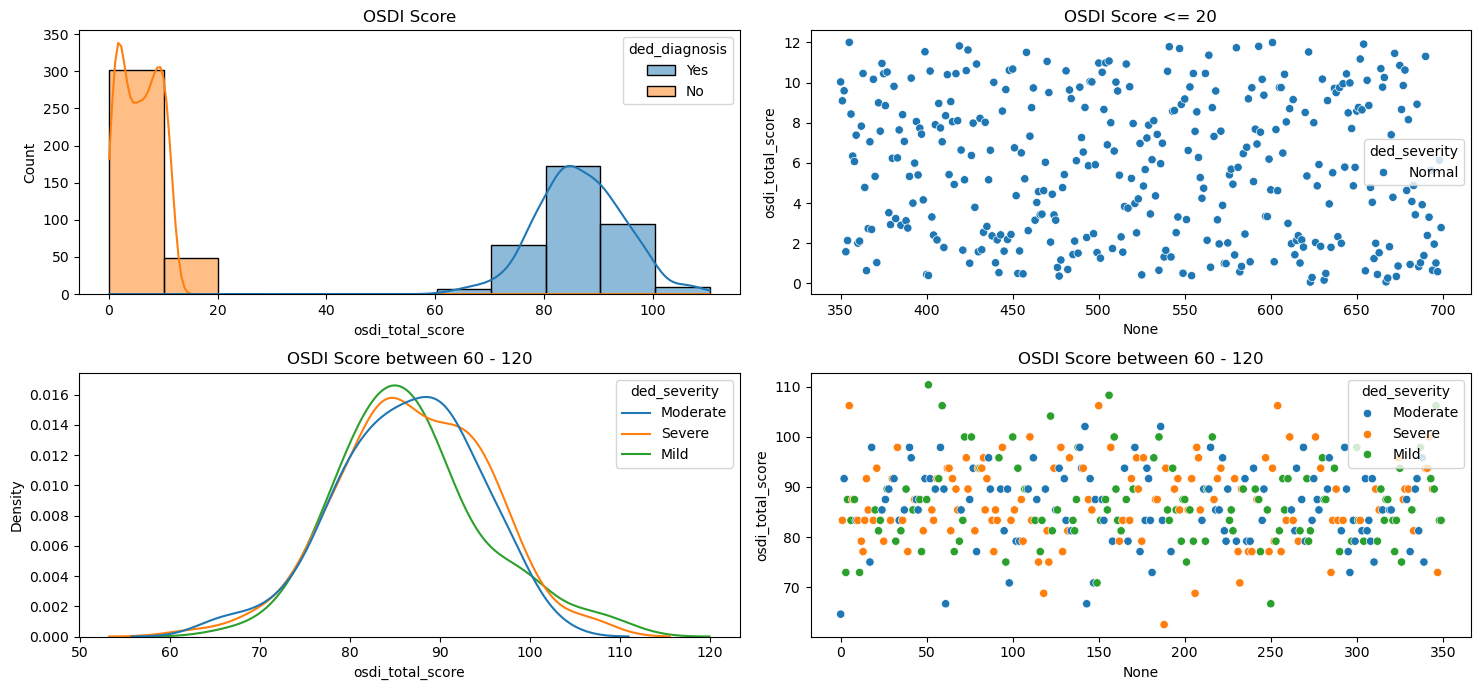

In [103]:
plt.figure(  figsize=[15, 7])

plt.subplot(221)
sns.histplot(x=df['osdi_total_score'], hue=df['ded_diagnosis'], kde=True)
plt.title('OSDI Score')

plt.subplot(223)
sns.kdeplot(x=df[df['osdi_total_score'] > 20]['osdi_total_score'], 
             hue=df[df['osdi_total_score'] > 20]['ded_severity'])
plt.title('OSDI Score between 60 - 120')

plt.subplot(222)
sns.scatterplot(y=df[df['osdi_total_score'] <= 20]['osdi_total_score'], 
                x=df[df['osdi_total_score'] <= 20][['osdi_total_score']].index, 
                hue=df[df['osdi_total_score'] <= 20]['ded_severity'])
plt.title('OSDI Score <= 20')

plt.subplot(224)
sns.scatterplot(y=df[df['osdi_total_score'] > 20]['osdi_total_score'], 
                x=df[df['osdi_total_score'] > 20][['osdi_total_score']].index, 
                hue=df[df['osdi_total_score'] > 20]['ded_severity'])
plt.title('OSDI Score between 60 - 120')

plt.tight_layout()

#### Observation :

- People with Non DED have OSDI Score between 0 - 20
- People with DED have OSDI score between 60 - 100

+ Severity level for DED is in Normal distribution

#### BIVARIATE ANALYSIS (Is there a relationship between OSDI scores and DED severity?)

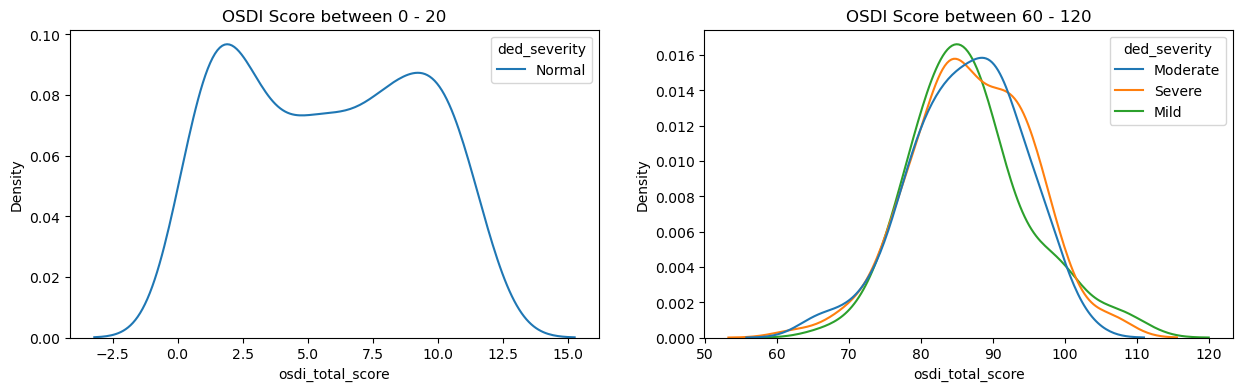

In [104]:
plt.figure(figsize=[15,4])

plt.subplot(121)
sns.kdeplot(x=df[df['osdi_total_score'] <= 20]['osdi_total_score'], 
             hue=df[df['osdi_total_score'] <= 20]['ded_severity'])
plt.title('OSDI Score between 0 - 20')

plt.subplot(122)
sns.kdeplot(x=df[df['osdi_total_score'] > 20]['osdi_total_score'], 
             hue=df[df['osdi_total_score'] > 20]['ded_severity'])
plt.title('OSDI Score between 60 - 120')

plt.show()

#### Observation :

- There's no relationship between the OSDI score and severity level
- OSDI score between 0 to 20 : NON DED
- OSDI score between 60 to 120 : DED
- In DED also all other severity levels are similar (seems like Normal distribution).

#### BIVARIATE ANALYSIS (Is there a relationship between OSDI scores, Gender and DED severity?)

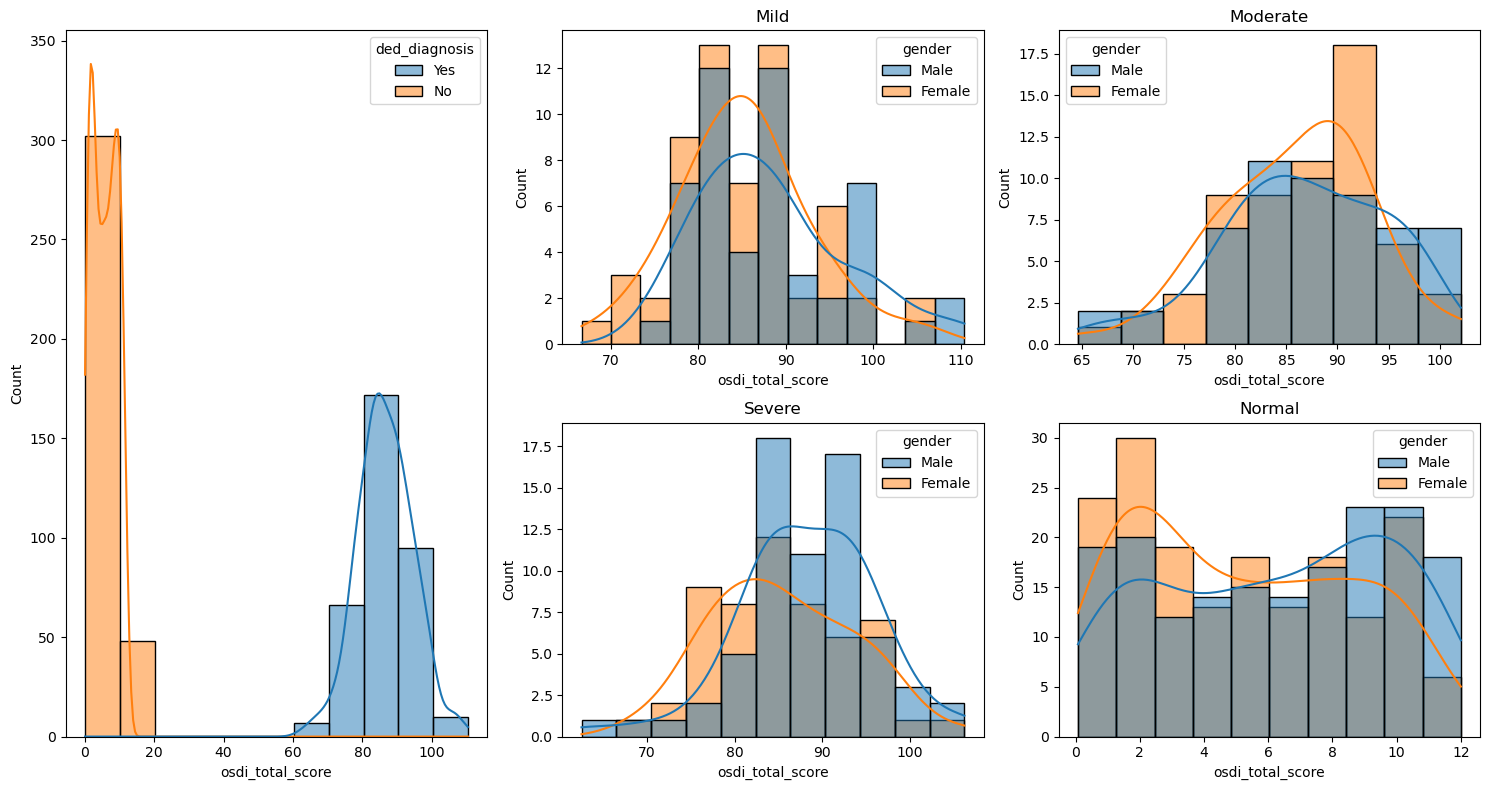

In [105]:
plt.figure(figsize=(15,8))

hue_ord = ['Male', 'Female']
plt.subplot(131)
sns.histplot(data=df,x='osdi_total_score',kde=True,hue='ded_diagnosis')

plt.subplot(232)
sns.histplot(data=df[df.ded_severity=='Mild'],x='osdi_total_score',kde=True,hue='gender' , hue_order=hue_ord)
plt.title('Mild')

plt.subplot(233)
sns.histplot(data=df[df.ded_severity=='Moderate'],x='osdi_total_score' ,kde=True,hue='gender' , hue_order=hue_ord)
plt.title('Moderate')

plt.subplot(235)
sns.histplot(data=df[df.ded_severity=='Severe'],x='osdi_total_score' ,kde=True,hue='gender' , hue_order=hue_ord)
plt.title('Severe')
 
plt.subplot(236)
sns.histplot(data=df[df.ded_severity=='Normal'],x='osdi_total_score',kde=True,hue='gender' , hue_order=hue_ord)
plt.title('Normal')

plt.tight_layout()
plt.show()


#### Observation :

- There are more Females with severity level Mild, Moderate, Normal. And More Males with Severe Severity level
- Female are more likely to get moderate and mild severity when OSDI score is < 80
- Where as Males get SEVERE severity level, when OSDI score is > 80

### schirmer's test, TBUT test

#### UNIVARIATE ANALYSIS (What is the distribution of schirmer's test & TBUT test ?)

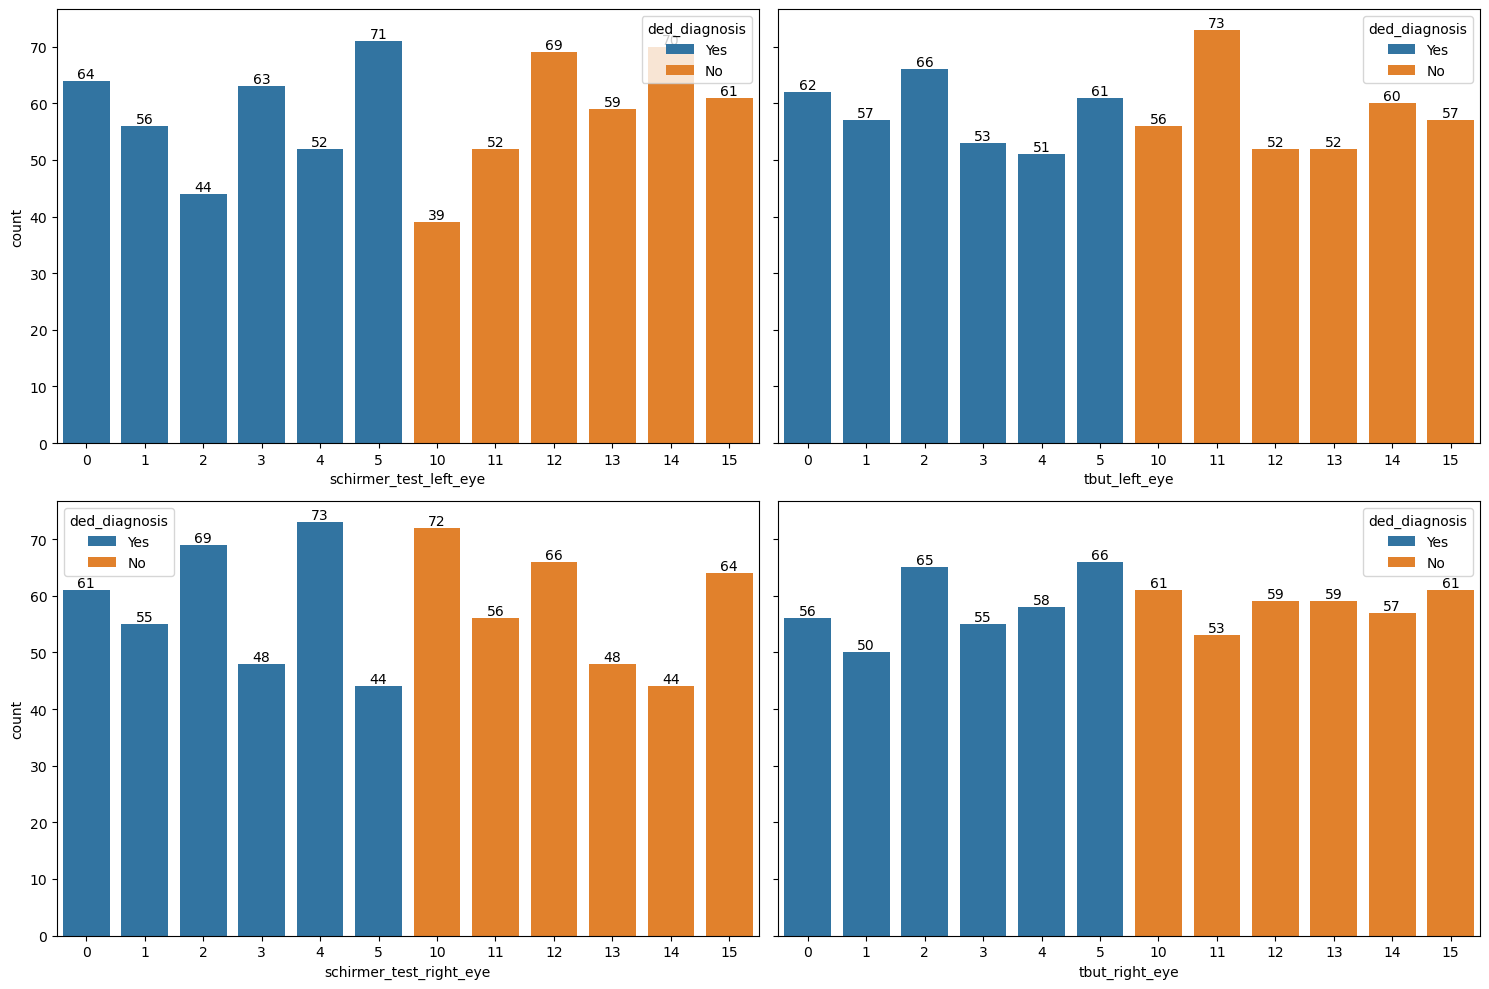

In [106]:
fig, ax = plt.subplots(2,2,figsize=[15,10], sharey=True )

sns.countplot(x=df['schirmer_test_left_eye'],ax=ax[0][0], hue=df['ded_diagnosis'])
for container in ax[0][0].containers:
    ax[0][0].bar_label(container, color='black')

sns.countplot(x=df['schirmer_test_right_eye'],ax=ax[1][0], hue=df['ded_diagnosis'])
for container in ax[1][0].containers:
    ax[1][0].bar_label(container, color='black')

sns.countplot(x=df['tbut_left_eye'],ax=ax[0][1], hue=df['ded_diagnosis'])
for container in ax[0][1].containers:
    ax[0][1].bar_label(container, color='black')

sns.countplot(x=df['tbut_right_eye'],ax=ax[1][1], hue=df['ded_diagnosis'])
for container in ax[1][1].containers:
    ax[1][1].bar_label(container, color='black')

plt.tight_layout()
plt.show()

#### Observation :

- Schirmer's score between 0 - 5 : DED
- schirmer's score between 10 - 15 : NON DED

+ TBUT Test score between 0 - 5 : DED
+ TBUT Test score between 10 - 15 : NON DED

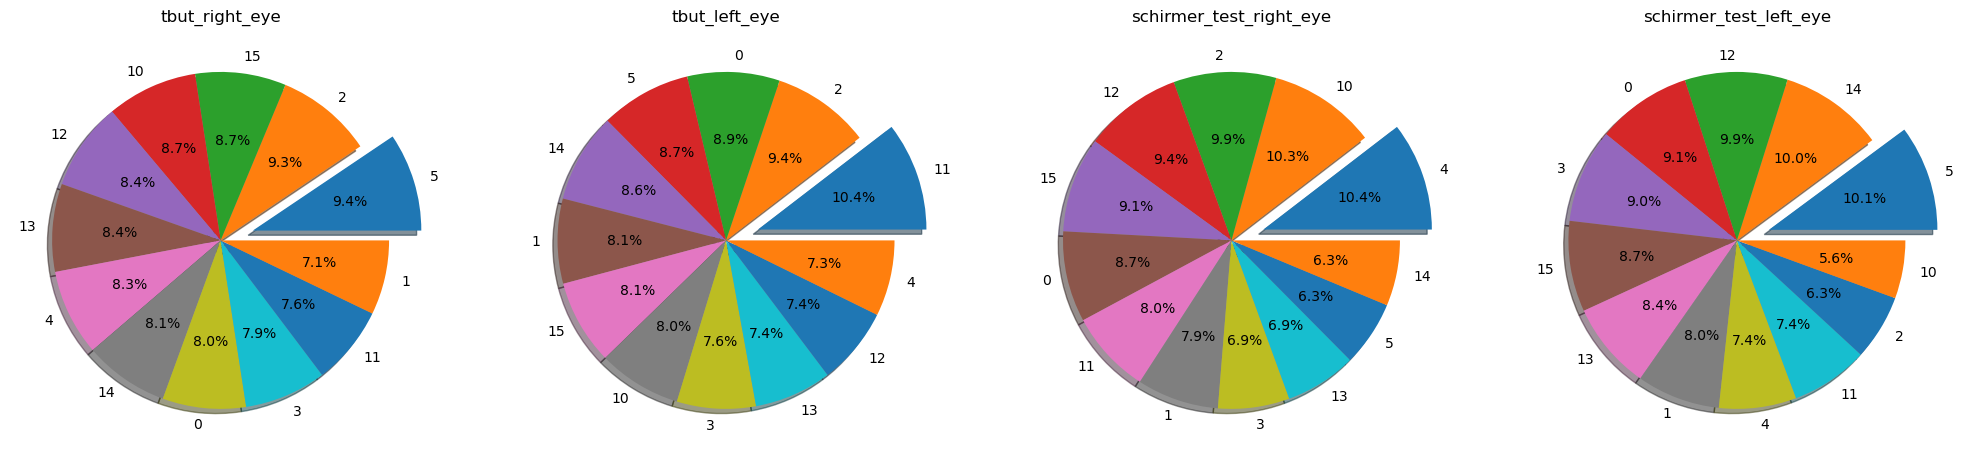

In [107]:
plt.figure(figsize=[25,20])

plt.subplot(141)
plt.pie(df['tbut_right_eye'].value_counts(), labels=df['tbut_right_eye'].value_counts().keys(),
         explode=[0.2,0,0,0,0,0,0,0,0,0,0,0],
        autopct='%1.1f%%',shadow=True, )
plt.title('tbut_right_eye')

plt.subplot(142)
plt.pie(df['tbut_left_eye'].value_counts(), labels=df['tbut_left_eye'].value_counts().keys(),
         explode=[0.2,0,0,0,0,0,0,0,0,0,0,0],
        autopct='%1.1f%%',shadow=True, )
plt.title('tbut_left_eye')

plt.subplot(143)
plt.pie(df['schirmer_test_right_eye'].value_counts(), labels=df['schirmer_test_right_eye'].value_counts().keys(),
         explode=[0.2,0,0,0,0,0,0,0,0,0,0,0],
        autopct='%1.1f%%',shadow=True, )
plt.title('schirmer_test_right_eye')

plt.subplot(144)
plt.pie(df['schirmer_test_left_eye'].value_counts(), labels=df['schirmer_test_left_eye'].value_counts().keys(),
         explode=[0.2,0,0,0,0,0,0,0,0,0,0,0],
        autopct='%1.1f%%',shadow=True, )
plt.title('schirmer_test_left_eye')

plt.show()

#### Observation :

- Most of the test scores contain 6 - 10 % proportion for each category.

####  BIVARIATE ANALYSIS (How do the Schirmer test and TBUT (Tear Break-up Time) scores relate to the DED diagnosis and severity?)

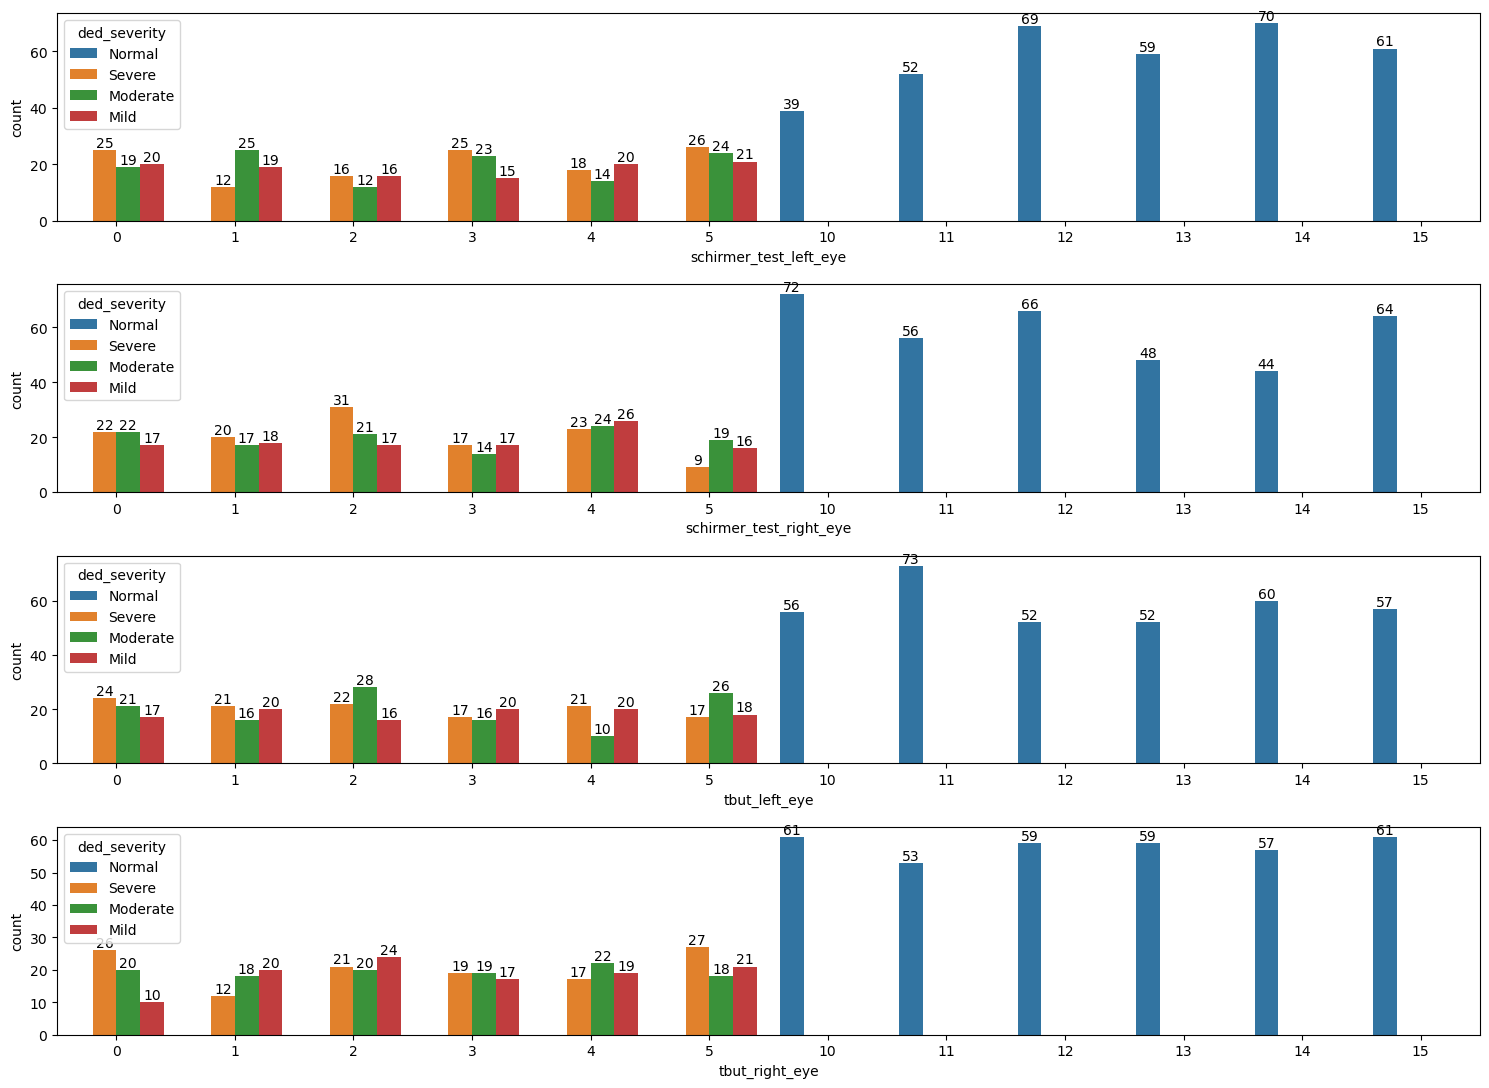

In [108]:
fig, ax = plt.subplots(4,1,figsize=[15,11])

sns.countplot(x=df['schirmer_test_left_eye'],ax=ax[0], hue=df['ded_severity'], hue_order=df['ded_severity'].value_counts().keys())
for container in ax[0].containers:
    ax[0].bar_label(container, color='black')

sns.countplot(x=df['schirmer_test_right_eye'],ax=ax[1], hue=df['ded_severity'], hue_order=df['ded_severity'].value_counts().keys())
for container in ax[1].containers:
    ax[1].bar_label(container, color='black')


sns.countplot(x=df['tbut_left_eye'],ax=ax[2], hue=df['ded_severity'], hue_order=df['ded_severity'].value_counts().keys())
for container in ax[2].containers:
    ax[2].bar_label(container, color='black')

sns.countplot(x=df['tbut_right_eye'],ax=ax[3], hue=df['ded_severity'], hue_order=df['ded_severity'].value_counts().keys())
for container in ax[3].containers:
    ax[3].bar_label(container, color='black')

plt.tight_layout()
plt.show()

#### Observation :

- Test scores below 5 are considered as DED
- Test scores above 10 are considered as NON DED

+ There's no exact correlation between the test score and severity level.

#### BIVARIATE ANALYSIS (Are there any trends between severity (ded_severity) and OSDI, TBUT, or Schirmer test scores?)

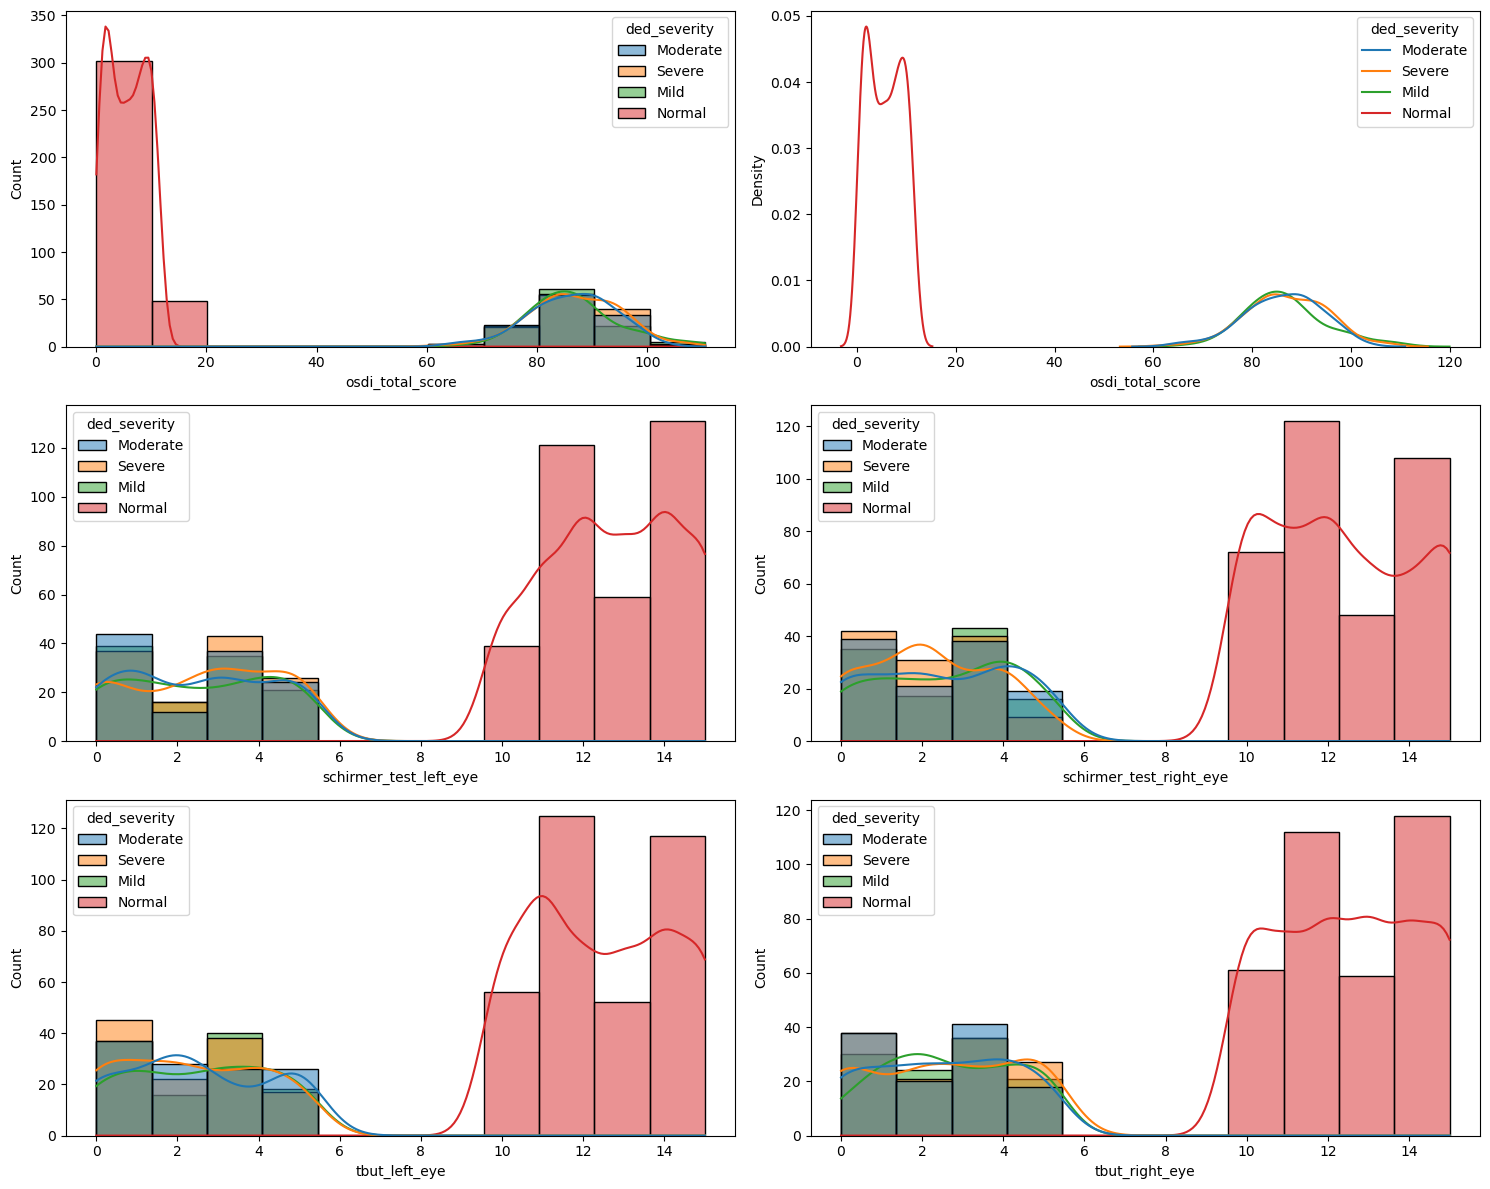

In [109]:
plt.figure(figsize=[15,12])
plt.subplot(321)
sns.histplot(x=df['osdi_total_score'], hue=df['ded_severity'], kde=True)

plt.subplot(322)
sns.kdeplot(x=df['osdi_total_score'], hue=df['ded_severity'] )
#plt.title('OSDI Score')

plt.subplot(323)
sns.histplot(x=df['schirmer_test_left_eye'], hue=df['ded_severity'], kde=True)
#plt.title('schirmer test left eye')

plt.subplot(324)
sns.histplot(x=df['schirmer_test_right_eye'], hue=df['ded_severity'], kde=True)
#plt.title('schirmer test right eye')

plt.subplot(325)
sns.histplot(x=df['tbut_left_eye'], hue=df['ded_severity'], kde=True)
#plt.title('TBUT left eye')

plt.subplot(326)
sns.histplot(x=df['tbut_right_eye'], hue=df['ded_severity'], kde=True)
#plt.title('schirmer test right eye')

plt.tight_layout()
plt.show()

#### Observation :

- schirmer test left eye - severe severity level is with 3, 4, 5 scores
- schirmer test right eye - severe severity level is with 0, 1 scores

+ tbut left eye - severe severity level is with 0, 1 scores.
+ tbut right eye - severe severity level is with 4, 5 scores.

#### BIVARAITE ANALYSIS (What is the average Schirmer test score for left and right eyes for DED vs. NON-DED individuals?)

In [110]:
df.groupby(['ded_diagnosis'])['schirmer_test_left_eye'].mean()

ded_diagnosis
No     12.72
Yes     2.56
Name: schirmer_test_left_eye, dtype: float64

In [111]:
df.groupby(['ded_diagnosis'])['schirmer_test_right_eye'].mean()

ded_diagnosis
No     12.365714
Yes     2.425714
Name: schirmer_test_right_eye, dtype: float64

In [112]:
df.groupby(['ded_diagnosis'])['tbut_left_eye'].mean()

ded_diagnosis
No     12.451429
Yes     2.448571
Name: tbut_left_eye, dtype: float64

In [113]:
df.groupby(['ded_diagnosis'])['tbut_right_eye'].mean()

ded_diagnosis
No     12.517143
Yes     2.591429
Name: tbut_right_eye, dtype: float64

#### Observation :

- Average values of TBUT test LEFT eye, schirmer test RIGHT eye for DED are close to each other.
- Average values of TBUT test RIGHT eye, schirmer test LEFT eye for DED are close to each other.

In [114]:
What is the relationship between ocular surface staining (left and right eyes) and DED severity?


Object `severity` not found.


### ocular surface staining

#### UNIVARIATE ANALYSIS (What is the distribution of Ocular surface staining ?)

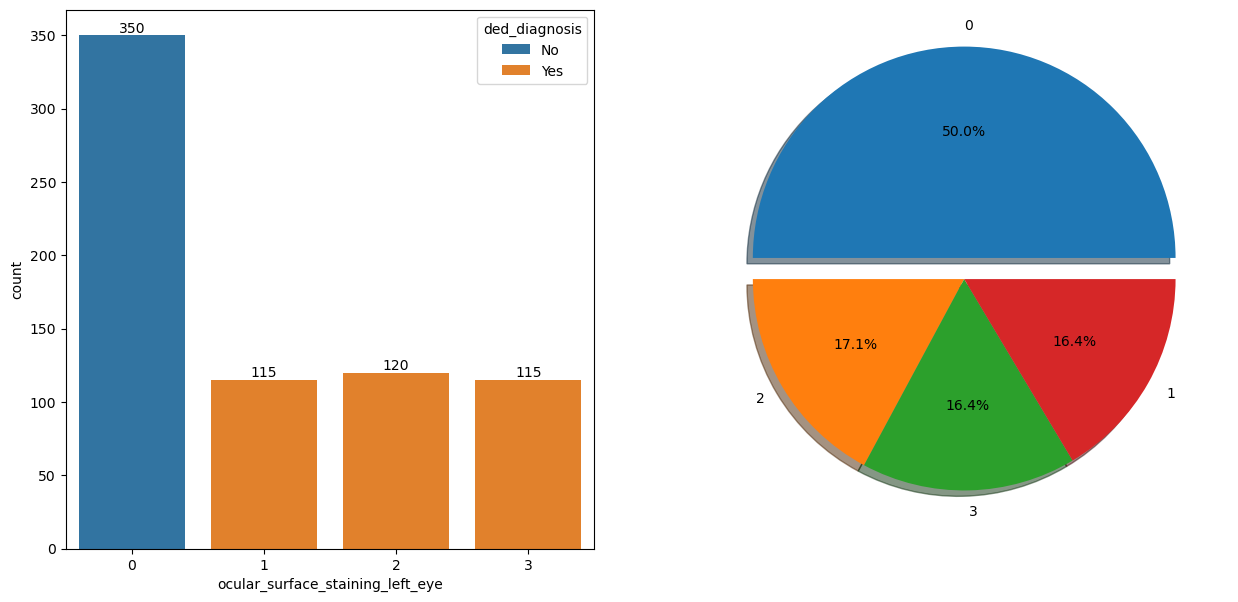

In [115]:
fig, ax = plt.subplots(1,2, figsize=[15,7])

sns.countplot(x=df['ocular_surface_staining_left_eye'], ax=ax[0], hue=df['ded_diagnosis'])
for container in ax[0].containers:
    ax[0].bar_label(container, color='black')
    
plt.pie(x=df['ocular_surface_staining_left_eye'].value_counts(), 
        labels=df['ocular_surface_staining_left_eye'].value_counts().keys(),
        explode=[0.1,0,0,0],
       autopct='%1.1f%%', shadow=True)

plt.show()

#### Observation :

- 50% of the samples are with 0 ocular surface staining score
- And remaining scores with 1, 2, 3 are around 16% each

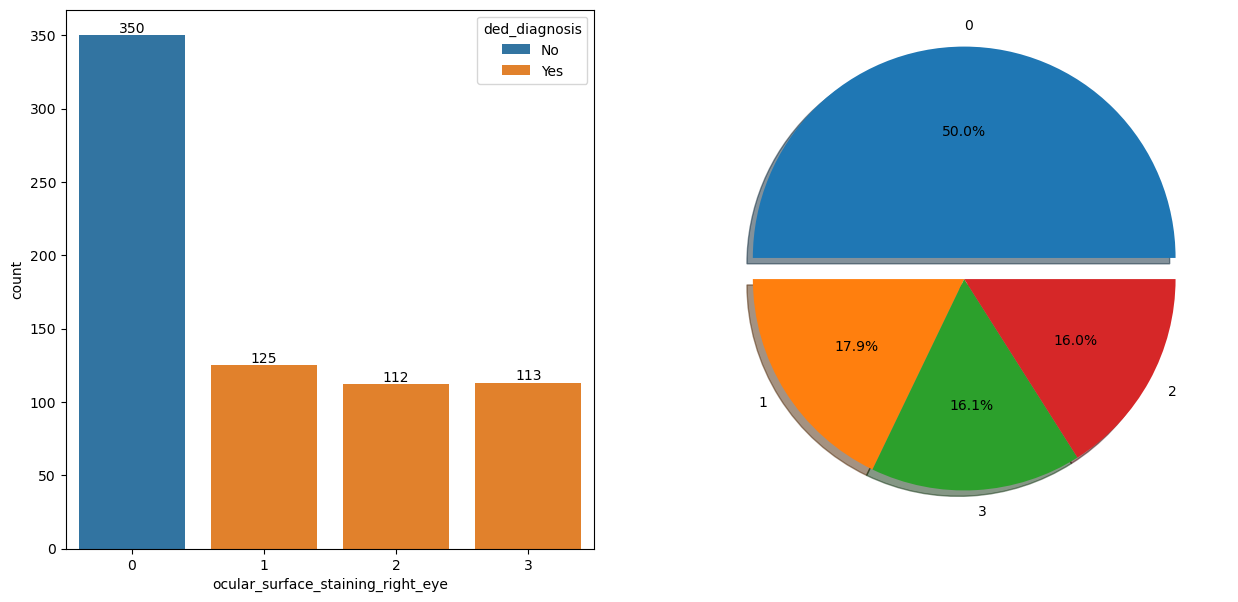

In [116]:
fig, ax = plt.subplots(1,2, figsize=[15,7])

sns.countplot(x=df['ocular_surface_staining_right_eye'], ax=ax[0], hue=df['ded_diagnosis'])
for container in ax[0].containers:
    ax[0].bar_label(container, color='black')
    
plt.pie(x=df['ocular_surface_staining_right_eye'].value_counts(), 
        labels=df['ocular_surface_staining_right_eye'].value_counts().keys(),
        explode=[0.1,0,0,0],
       autopct='%1.1f%%', shadow=True)

plt.show()

#### Observation :

- 50% of the samples are with 0 ocular surface staining score
- And remaining scores with 1, 2, 3 are around 0.16% each

#### BIVARIATE ANALYSIS (What is the relationship between ocular surface staining (left and right eyes) and DED severity?)


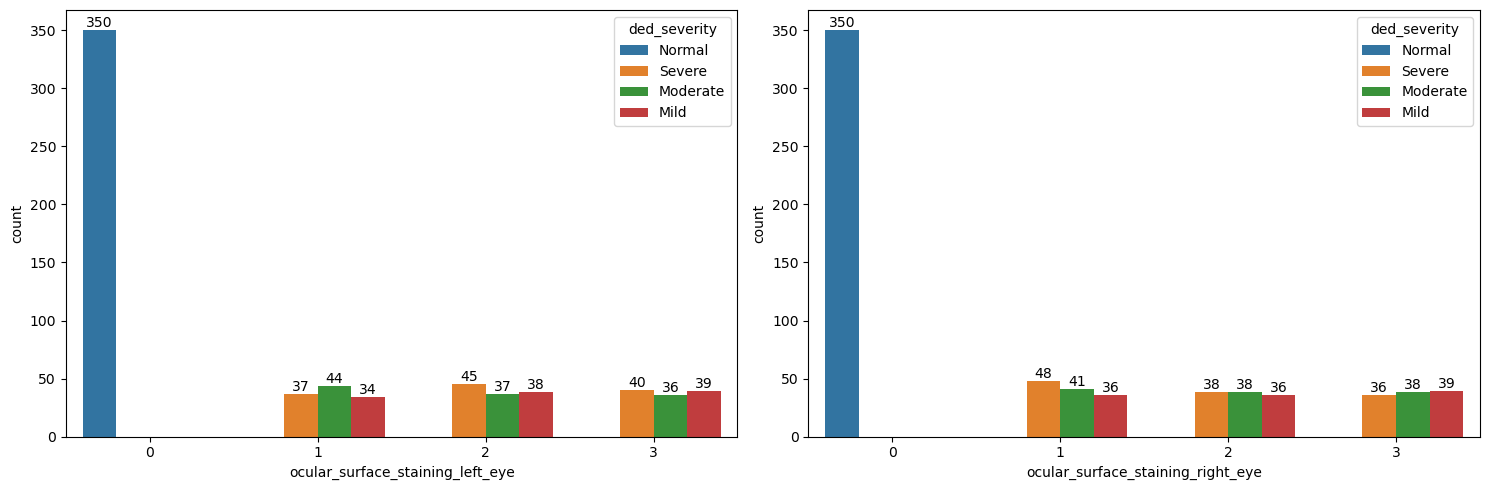

In [117]:
fig, ax = plt.subplots(1,2, figsize=[15,5])

sns.countplot(x=df['ocular_surface_staining_left_eye'],ax=ax[0], hue=df['ded_severity'], hue_order=df['ded_severity'].value_counts().keys())
for container in ax[0].containers:
    ax[0].bar_label(container, color='black')
 
sns.countplot(x=df['ocular_surface_staining_right_eye'], ax=ax[1], hue=df['ded_severity'], hue_order=df['ded_severity'].value_counts().keys())
for container in ax[1].containers:
    ax[1].bar_label(container, color='black')


plt.tight_layout()

In [118]:
pd.crosstab(df['ocular_surface_staining_left_eye'], df['ded_severity'], margins=True )

ded_severity                      Mild  Moderate  Normal  Severe  All
ocular_surface_staining_left_eye                                     
0                                    0         0     350       0  350
1                                   34        44       0      37  115
2                                   38        37       0      45  120
3                                   39        36       0      40  115
All                                111       117     350     122  700

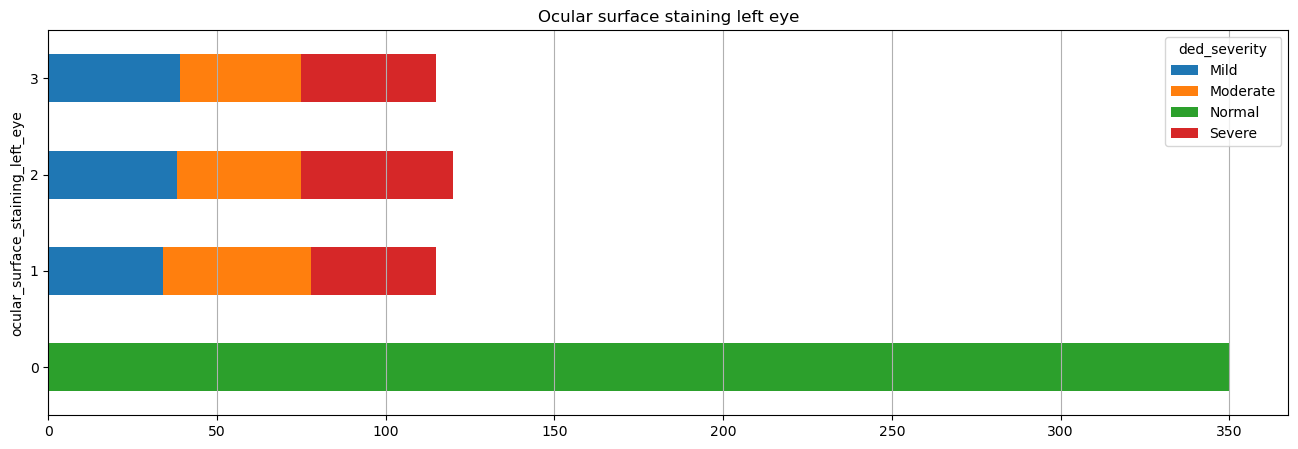

In [119]:
pd.crosstab(df['ocular_surface_staining_left_eye'] , df['ded_severity']).plot(kind='barh', stacked=True, figsize=[16,5] )

plt.title('Ocular surface staining left eye')
plt.grid(axis='x')
plt.show()

#### Observation :

- More proportion of 'Severe' severity level is in ocular surface = 2, and 'moderate' severity is in score = 1

In [120]:
pd.crosstab(df['ocular_surface_staining_right_eye'], df['ded_severity'], margins=True )

ded_severity                       Mild  Moderate  Normal  Severe  All
ocular_surface_staining_right_eye                                     
0                                     0         0     350       0  350
1                                    36        41       0      48  125
2                                    36        38       0      38  112
3                                    39        38       0      36  113
All                                 111       117     350     122  700

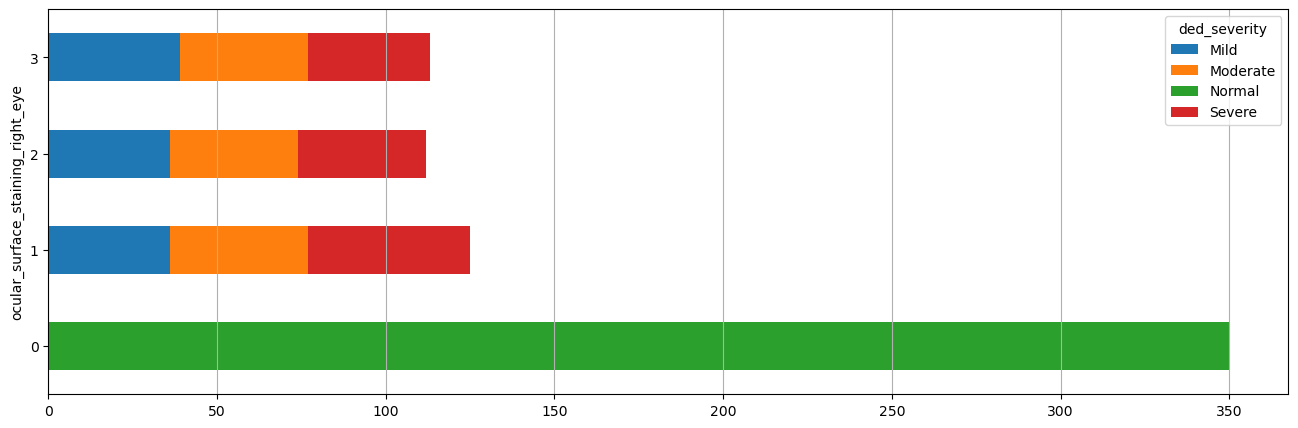

In [121]:
ax=pd.crosstab(df['ocular_surface_staining_right_eye'], df['ded_severity']).plot(kind='barh', stacked=True, figsize=[16,5] )
plt.grid(axis='x')

#### Observation :

- More proportion of 'severe' severity level is in ocular surface staining = 1.
- And Other severity levels are approximately equal.

### ded severity

#### UNIVARIATE ANALYSIS (What is the distribution of DED severity ?)

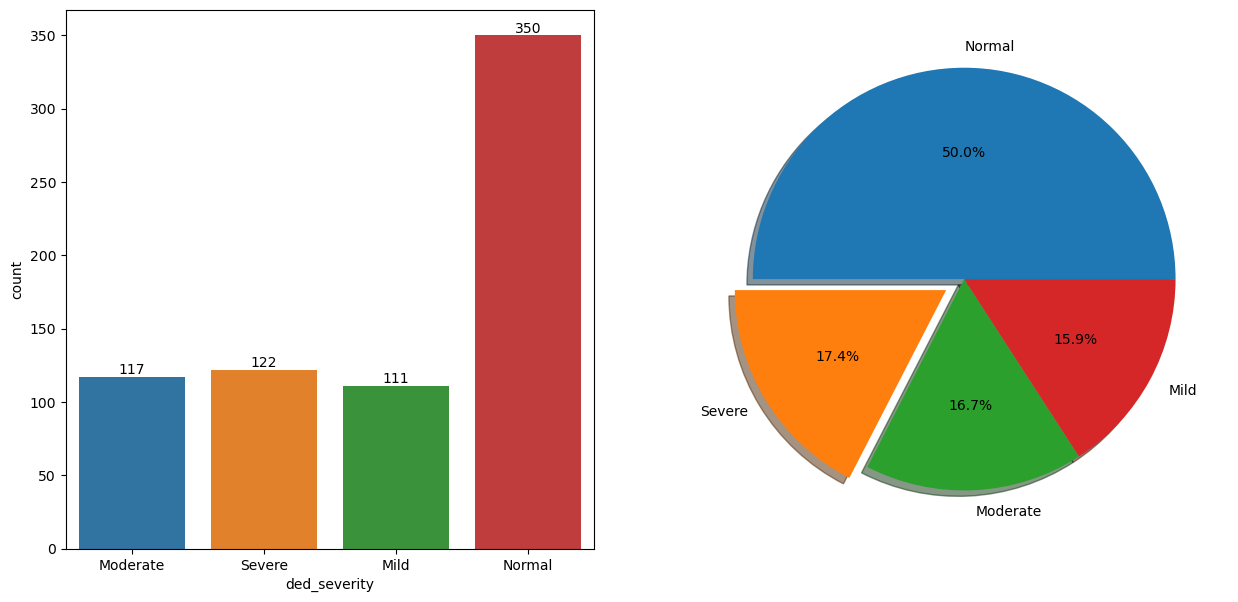

In [122]:
plt.figure(figsize=[15,7])

plt.subplot(121)
ax = sns.countplot(x=df['ded_severity'], hue=df['ded_severity'])
for container in ax.containers:
    plt.bar_label(container)

plt.subplot(122)
plt.pie(x=df['ded_severity'].value_counts(), labels=df['ded_severity'].value_counts().keys(),
       autopct='%1.1f%%',
       explode=[0, 0.1 ,0 ,0],
       shadow=True)

plt.show()

#### Observation :

- 50% of the samples are 'Normal' : Non DED
- And remaining scores with Severe, Moderate, Mild are around 16 - 17% each : DED 

### Feature extraction 

#### device types used 

In [123]:
df['device_types_used'].value_counts()

device_types_used
Gaming Console, Smartphone, Tablet    250
Smartphone, Computer                  233
Tablet, Smartphone                    217
Name: count, dtype: int64

In [124]:
df['device_types_used'].str.extract('(Smartphone)')

0
0    Smartphone
1    Smartphone
2    Smartphone
3    Smartphone
4    Smartphone
..          ...
695  Smartphone
696  Smartphone
697  Smartphone
698  Smartphone
699  Smartphone

[700 rows x 1 columns]

In [125]:
df['device_smartphone'] = df['device_types_used'].str.extract('(Smartphone)').replace('Smartphone', 'Yes')

In [126]:
df['device_smartphone'].value_counts()

device_smartphone
Yes    700
Name: count, dtype: int64

In [127]:
df['device_types_used'].str.extract('(Computer)')

0
0    Computer
1         NaN
2    Computer
3         NaN
4         NaN
..        ...
695  Computer
696  Computer
697  Computer
698  Computer
699       NaN

[700 rows x 1 columns]

In [128]:
df['device_computer'] = df['device_types_used'].str.extract('(Computer)').replace('Computer', 'Yes')

In [129]:
df['device_computer'].value_counts()

device_computer
Yes    233
Name: count, dtype: int64

In [130]:
df['device_types_used'].str.extract('(Tablet)')

0
0       NaN
1    Tablet
2       NaN
3    Tablet
4    Tablet
..      ...
695     NaN
696     NaN
697     NaN
698     NaN
699  Tablet

[700 rows x 1 columns]

In [131]:
df['device_tablet'] = df['device_types_used'].str.extract('(Tablet)').replace('Tablet', 'Yes')

In [132]:
df['device_tablet'].value_counts()

device_tablet
Yes    467
Name: count, dtype: int64

In [133]:
df['device_types_used'].str.extract('(Gaming\sConsole)')

0
0               NaN
1               NaN
2               NaN
3    Gaming Console
4               NaN
..              ...
695             NaN
696             NaN
697             NaN
698             NaN
699  Gaming Console

[700 rows x 1 columns]

In [134]:
df['device_gaming_console'] = df['device_types_used'].str.extract('(Gaming\sConsole)').replace('Gaming Console', 'Yes')


In [135]:
df['device_gaming_console'].value_counts()

device_gaming_console
Yes    250
Name: count, dtype: int64

In [136]:
df.head()

age  gender                   device_types_used  average_daily_usage_hours  \
0   17  Female                Smartphone, Computer                          5   
1   22  Female                  Tablet, Smartphone                          8   
2   24  Female                Smartphone, Computer                          4   
3   16  Female  Gaming Console, Smartphone, Tablet                          7   
4   21    Male                  Tablet, Smartphone                          4   

   years_of_digital_device_usage ded_diagnosis  osdi_total_score  \
0                             11           Yes         64.583333   
1                              1           Yes         83.333333   
2                              4           Yes         91.666667   
3                             10           Yes         72.916667   
4                              1           Yes         87.500000   

   schirmer_test_left_eye  schirmer_test_right_eye  tbut_left_eye  \
0                       1                        5              1   
1                       2                        0              2   
2                       1                        2              2   
3                       0                        5              4   
4                       2                        3              3   

   tbut_right_eye  ocular_surface_staining_left_eye  \
0               4                                 3   
1               1                                 3   
2               5                                 1   
3               1                                 1   
4               1                                 3   

   ocular_surface_staining_right_eye ded_severity device_smartphone  \
0                                  2     Moderate               Yes   
1                                  1       Severe               Yes   
2                                  1     Moderate               Yes   
3                                  3         Mild               Yes   
4                                  3         Mild               Yes   

  device_computer device_tablet device_gaming_console  
0             Yes           NaN                   NaN  
1             NaN           Yes                   NaN  
2             Yes           NaN                   NaN  
3             NaN           Yes                   Yes  
4             NaN           Yes                   NaN

In [137]:
# filling Nan values with No

df['device_computer'].fillna('No', inplace=True)
df['device_gaming_console'].fillna('No', inplace=True)
df['device_tablet'].fillna('No', inplace=True)


### different device types

#### UNIVARAITE ANALYSIS (What is the distribution of different device types ?)

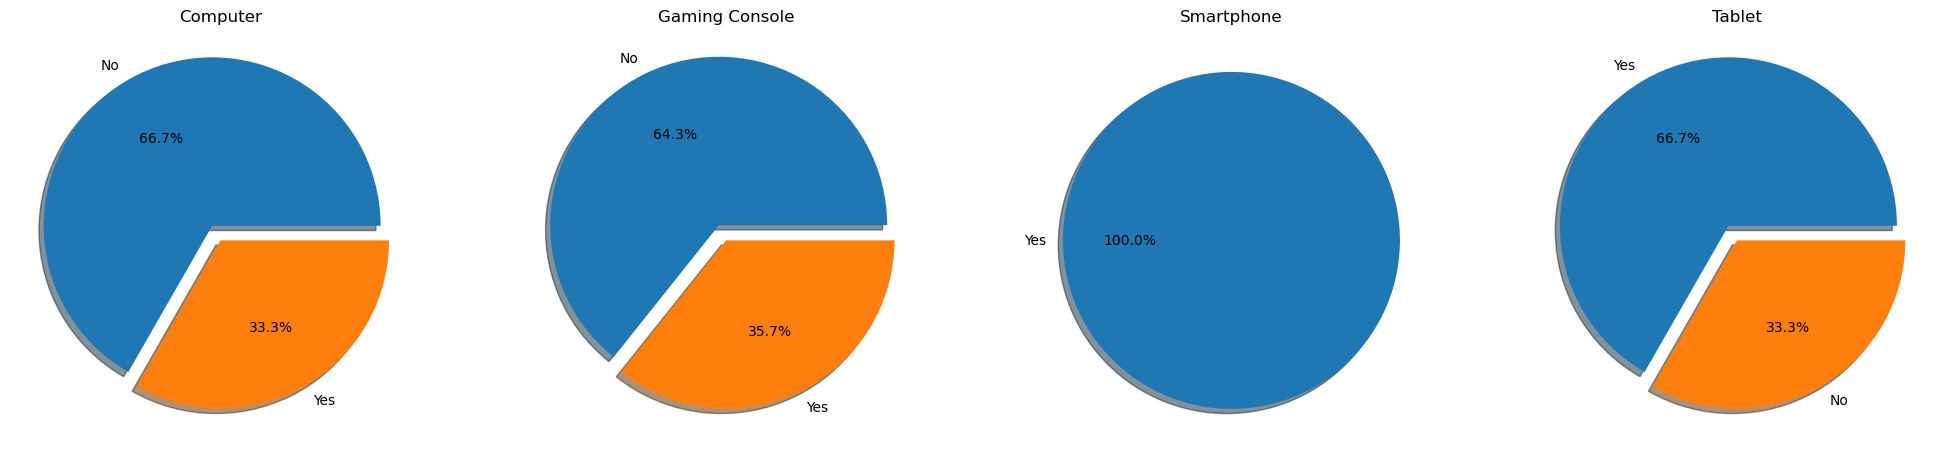

In [138]:
plt.figure(figsize=[25,20])

plt.subplot(141)
plt.pie(df['device_computer'].value_counts(), labels=df['device_computer'].value_counts().keys(),
         explode=[0.1,0 ],
        autopct='%1.1f%%',shadow=True, )
plt.title('Computer')

plt.subplot(142)
plt.pie(df['device_gaming_console'].value_counts(), labels=df['device_gaming_console'].value_counts().keys(),
         explode=[0.1,0 ],
        autopct='%1.1f%%',shadow=True, )
plt.title('Gaming Console')

plt.subplot(143)
plt.pie(df['device_smartphone'].value_counts(), labels=df['device_smartphone'].value_counts().keys(),
        
        autopct='%1.1f%%',shadow=True, )
plt.title('Smartphone')

plt.subplot(144)
plt.pie(df['device_tablet'].value_counts(), labels=df['device_tablet'].value_counts().keys(),
         explode=[0.1,0 ],
        autopct='%1.1f%%',shadow=True, )
plt.title('Tablet')

plt.show()

#### BIVARIATE ANALYSIS (Is there any relation between different device types and ded diagnosis ?)

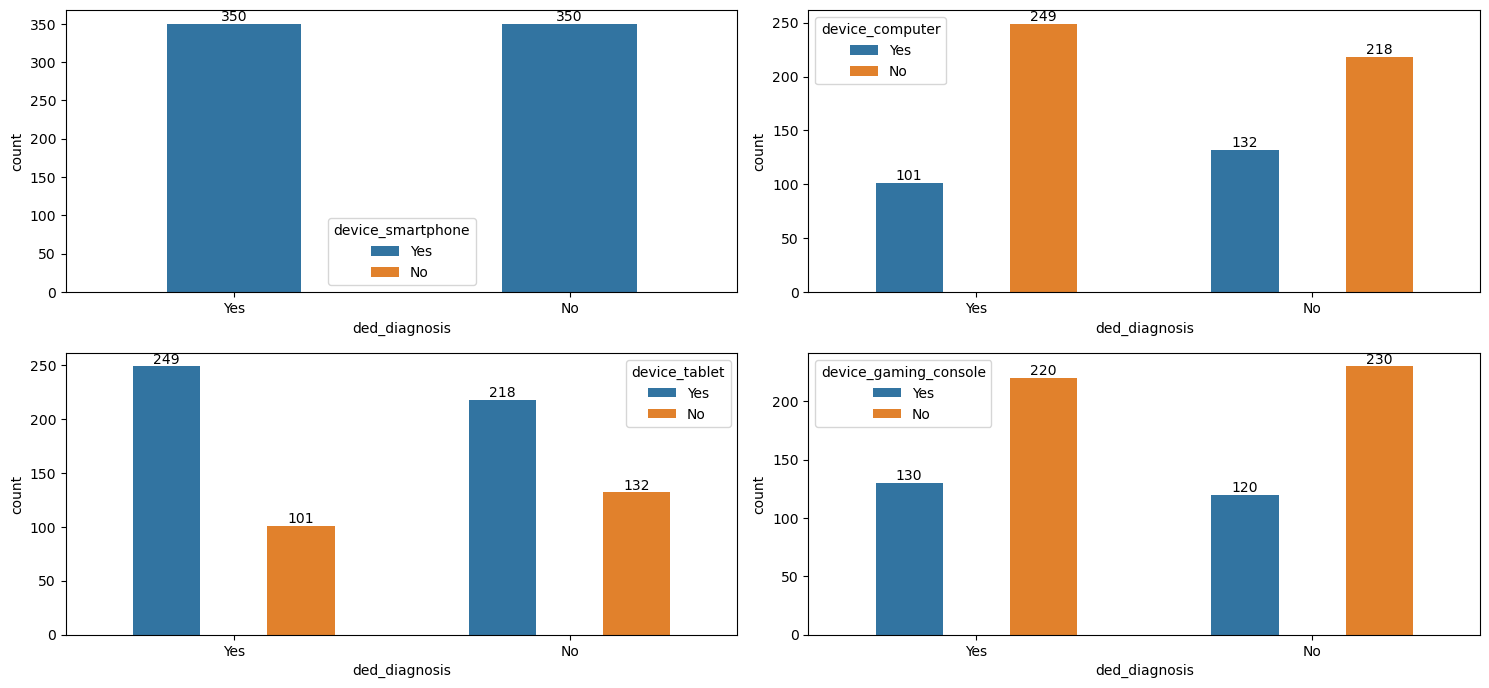

In [139]:
plt.figure(figsize=[15,7])

plt.subplot(2, 2, 1)
ax=sns.countplot(data = df, x =df['ded_diagnosis'], hue='device_smartphone',hue_order=['Yes', 'No'],gap=.5)
for container in ax.containers:
    plt.bar_label(container)

plt.subplot(2, 2, 2)
ax=sns.countplot(data = df, x =df['ded_diagnosis'], hue='device_computer', hue_order=['Yes', 'No'],gap=.5)
for container in ax.containers:
    plt.bar_label(container)

plt.subplot(2, 2, 3)
ax=sns.countplot(data = df, x =df['ded_diagnosis'], hue='device_tablet',hue_order=['Yes', 'No'],gap=.5)
for container in ax.containers:
    plt.bar_label(container)

plt.subplot(2, 2, 4)
ax=sns.countplot(data = df, x =df['ded_diagnosis'], hue='device_gaming_console',hue_order=['Yes', 'No'],gap=.5)
for container in ax.containers:
    plt.bar_label(container)

plt.tight_layout()

#### Observation :

Persons with DED diagnosis = YES and NO
- Individuals are using Smartphones in equal proportion
- Computer is used by less persons who are diagnosed
- Tablet is used by more person those who are diagnosed
- Gaming console is used approximately equal proportion by both DED diagnosis Yes and No


### gender - different device types - ded diagnosis

#### MULTIVARIATE ANALYSIS (Whose proportion is high when compared with gender, different device types with ded diagnosis ?)

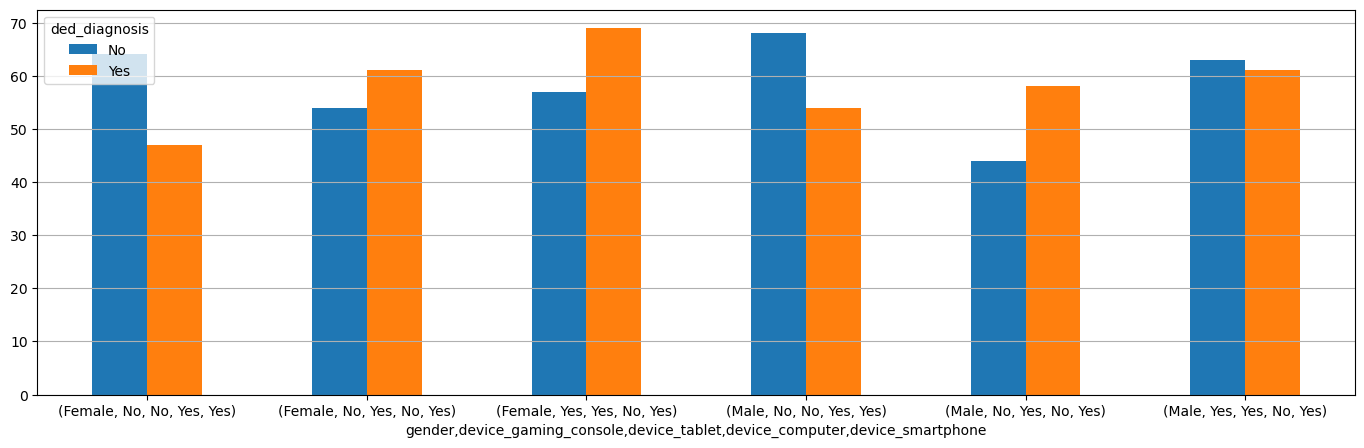

In [140]:
pd.crosstab(index=[df['gender'],
                   df['device_gaming_console'],
                  df['device_tablet'],
                  df['device_computer'],
                  df['device_smartphone'],
                  ],
            columns=df['ded_diagnosis']).plot(kind='bar', stacked=False , figsize=[17,5])
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.show()

#### Observation :

- Female with (Ded_diagnosis = Yes) are more when compared to Ded_diagnosis = No

- Male with (Ded_diagnosis = NO) are more when compared to Ded_diagnosis = Yes

- Overall there are More Females with (Ded_diagnosis = Yes) when compared to male

In [141]:
df.head()

age  gender                   device_types_used  average_daily_usage_hours  \
0   17  Female                Smartphone, Computer                          5   
1   22  Female                  Tablet, Smartphone                          8   
2   24  Female                Smartphone, Computer                          4   
3   16  Female  Gaming Console, Smartphone, Tablet                          7   
4   21    Male                  Tablet, Smartphone                          4   

   years_of_digital_device_usage ded_diagnosis  osdi_total_score  \
0                             11           Yes         64.583333   
1                              1           Yes         83.333333   
2                              4           Yes         91.666667   
3                             10           Yes         72.916667   
4                              1           Yes         87.500000   

   schirmer_test_left_eye  schirmer_test_right_eye  tbut_left_eye  \
0                       1                        5              1   
1                       2                        0              2   
2                       1                        2              2   
3                       0                        5              4   
4                       2                        3              3   

   tbut_right_eye  ocular_surface_staining_left_eye  \
0               4                                 3   
1               1                                 3   
2               5                                 1   
3               1                                 1   
4               1                                 3   

   ocular_surface_staining_right_eye ded_severity device_smartphone  \
0                                  2     Moderate               Yes   
1                                  1       Severe               Yes   
2                                  1     Moderate               Yes   
3                                  3         Mild               Yes   
4                                  3         Mild               Yes   

  device_computer device_tablet device_gaming_console  
0             Yes            No                    No  
1              No           Yes                    No  
2             Yes            No                    No  
3              No           Yes                   Yes  
4              No           Yes                    No

In [142]:
df.columns

Index(['age', 'gender', 'device_types_used', 'average_daily_usage_hours',
       'years_of_digital_device_usage', 'ded_diagnosis', 'osdi_total_score',
       'schirmer_test_left_eye', 'schirmer_test_right_eye', 'tbut_left_eye',
       'tbut_right_eye', 'ocular_surface_staining_left_eye',
       'ocular_surface_staining_right_eye', 'ded_severity',
       'device_smartphone', 'device_computer', 'device_tablet',
       'device_gaming_console'],
      dtype='object')

In [143]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : \n{}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : \n{}'.format(len(categorical_features), categorical_features))

We have 10 numerical features : 
['age', 'average_daily_usage_hours', 'years_of_digital_device_usage', 'osdi_total_score', 'schirmer_test_left_eye', 'schirmer_test_right_eye', 'tbut_left_eye', 'tbut_right_eye', 'ocular_surface_staining_left_eye', 'ocular_surface_staining_right_eye']

We have 8 categorical features : 
['gender', 'device_types_used', 'ded_diagnosis', 'ded_severity', 'device_smartphone', 'device_computer', 'device_tablet', 'device_gaming_console']


In [144]:
# getting all different types of features

num_features = [feature for feature in df.columns if df[feature].dtype != 'object']
print('Number of Numerical features :', len(num_features))

cat_features = [feature for feature in df.columns if df[feature].dtype == 'object']
print('Number of Categorical features :', len(cat_features))

discrete_features = [feature for feature in num_features if len(df[feature].unique()) <= 25 ]
print('Number of discrete features :', len(discrete_features))

continuous_features = [feature for feature in num_features if feature not in discrete_features]
print('Number of continuous features :', len(continuous_features))

Number of Numerical features : 10
Number of Categorical features : 8
Number of discrete features : 9
Number of continuous features : 1


In [145]:
cat_features

['gender',
 'device_types_used',
 'ded_diagnosis',
 'ded_severity',
 'device_smartphone',
 'device_computer',
 'device_tablet',
 'device_gaming_console']

In [146]:
num_features

['age',
 'average_daily_usage_hours',
 'years_of_digital_device_usage',
 'osdi_total_score',
 'schirmer_test_left_eye',
 'schirmer_test_right_eye',
 'tbut_left_eye',
 'tbut_right_eye',
 'ocular_surface_staining_left_eye',
 'ocular_surface_staining_right_eye']

In [147]:
discrete_features

['age',
 'average_daily_usage_hours',
 'years_of_digital_device_usage',
 'schirmer_test_left_eye',
 'schirmer_test_right_eye',
 'tbut_left_eye',
 'tbut_right_eye',
 'ocular_surface_staining_left_eye',
 'ocular_surface_staining_right_eye']

In [148]:
continuous_features

['osdi_total_score']

## Multi-variate Analysis : 

In [149]:
df.describe()

age  average_daily_usage_hours  years_of_digital_device_usage  \
count  700.000000                 700.000000                     700.000000   
mean    20.987143                   6.021429                       6.424286   
std      5.562351                   2.567732                       3.424850   
min     12.000000                   2.000000                       1.000000   
25%     16.000000                   4.000000                       3.000000   
50%     21.000000                   6.000000                       6.000000   
75%     26.000000                   8.000000                       9.000000   
max     30.000000                  10.000000                      12.000000   

       osdi_total_score  schirmer_test_left_eye  schirmer_test_right_eye  \
count        700.000000               700.00000               700.000000   
mean          46.196814                 7.64000                 7.395714   
std           40.955650                 5.36124                 5.262683   
min            0.070000                 0.00000                 0.000000   
25%            5.757500                 3.00000                 2.000000   
50%           37.250000                 7.50000                 7.500000   
75%           85.416667                13.00000                12.000000   
max          110.416667                15.00000                15.000000   

       tbut_left_eye  tbut_right_eye  ocular_surface_staining_left_eye  \
count     700.000000      700.000000                        700.000000   
mean        7.450000        7.554286                          1.000000   
std         5.292753        5.256366                          1.153461   
min         0.000000        0.000000                          0.000000   
25%         2.000000        3.000000                          0.000000   
50%         7.500000        7.500000                          0.500000   
75%        12.000000       13.000000                          2.000000   
max        15.000000       15.000000                          3.000000   

       ocular_surface_staining_right_eye  
count                         700.000000  
mean                            0.982857  
std                             1.143367  
min                             0.000000  
25%                             0.000000  
50%                             0.500000  
75%                             2.000000  
max                             3.000000

In [150]:
pd.set_option('display.max_columns', None)

In [151]:
df.groupby(['ded_diagnosis']).describe()

age                                                     \
               count       mean       std   min   25%   50%   75%   max   
ded_diagnosis                                                             
No             350.0  21.134286  5.525323  12.0  16.0  21.0  26.0  30.0   
Yes            350.0  20.840000  5.603171  12.0  16.0  21.0  26.0  30.0   

              average_daily_usage_hours                                     \
                                  count      mean       std  min  25%  50%   
ded_diagnosis                                                                
No                                350.0  5.997143  2.568822  2.0  4.0  6.0   
Yes                               350.0  6.045714  2.570088  2.0  4.0  6.0   

                         years_of_digital_device_usage                      \
               75%   max                         count      mean       std   
ded_diagnosis                                                                
No             8.0  10.0                         350.0  6.428571  3.419024   
Yes            8.0  10.0                         350.0  6.420000  3.435555   

                                        osdi_total_score                       \
               min  25%  50%  75%   max            count       mean       std   
ded_diagnosis                                                                   
No             1.0  3.0  6.0  9.0  12.0            350.0   5.732914  3.520652   
Yes            1.0  3.0  6.0  9.0  12.0            350.0  86.660714  7.943826   

                                                                 \
                 min      25%        50%        75%         max   
ded_diagnosis                                                     
No              0.07   2.3725   5.735000   8.827500   12.000000   
Yes            62.50  81.2500  85.416667  91.666667  110.416667   

              schirmer_test_left_eye                                           \
                               count   mean       std   min   25%   50%   75%   
ded_diagnosis                                                                   
No                             350.0  12.72  1.618801  10.0  11.0  13.0  14.0   
Yes                            350.0   2.56  1.785199   0.0   1.0   3.0   4.0   

                    schirmer_test_right_eye                                   \
                max                   count       mean       std   min   25%   
ded_diagnosis                                                                  
No             15.0                   350.0  12.365714  1.773078  10.0  11.0   
Yes             5.0                   350.0   2.425714  1.668492   0.0   1.0   

                                tbut_left_eye                             \
                50%   75%   max         count       mean       std   min   
ded_diagnosis                                                              
No             12.0  14.0  15.0         350.0  12.451429  1.718494  10.0   
Yes             2.0   4.0   5.0         350.0   2.448571  1.726728   0.0   

                                      tbut_right_eye                       \
                25%   50%   75%   max          count       mean       std   
ded_diagnosis                                                               
No             11.0  12.0  14.0  15.0          350.0  12.517143  1.725751   
Yes             1.0   2.0   4.0   5.0          350.0   2.591429  1.720077   

                                            ocular_surface_staining_left_eye  \
                min   25%   50%   75%   max                            count   
ded_diagnosis                                                                  
No             10.0  11.0  13.0  14.0  15.0                            350.0   
Yes             0.0   1.0   3.0   4.0   5.0                            350.0   

                                                       \
              mean       std  min  25%  50%  75%  max   
ded_diagnosis               

In [152]:
df.columns

Index(['age', 'gender', 'device_types_used', 'average_daily_usage_hours',
       'years_of_digital_device_usage', 'ded_diagnosis', 'osdi_total_score',
       'schirmer_test_left_eye', 'schirmer_test_right_eye', 'tbut_left_eye',
       'tbut_right_eye', 'ocular_surface_staining_left_eye',
       'ocular_surface_staining_right_eye', 'ded_severity',
       'device_smartphone', 'device_computer', 'device_tablet',
       'device_gaming_console'],
      dtype='object')

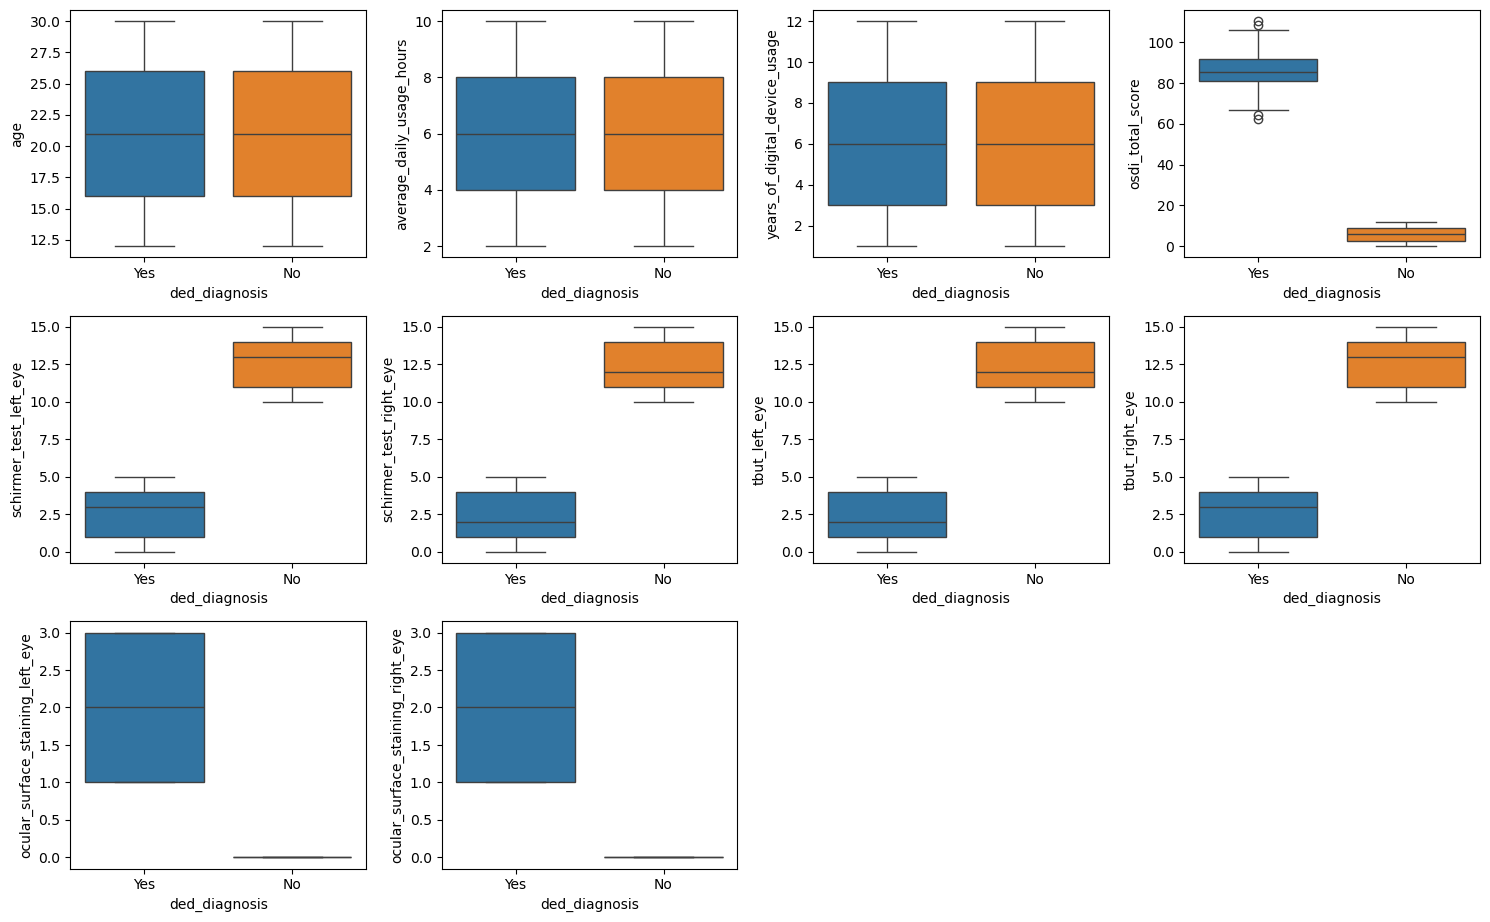

In [153]:
plt.figure(figsize=[15,15])
i=1

for column in list(num_features):
    plt.subplot(5,4,i)
    sns.boxplot(y=df[column], x=df['ded_diagnosis'], hue=df['ded_diagnosis'])
    i+=1
plt.tight_layout()

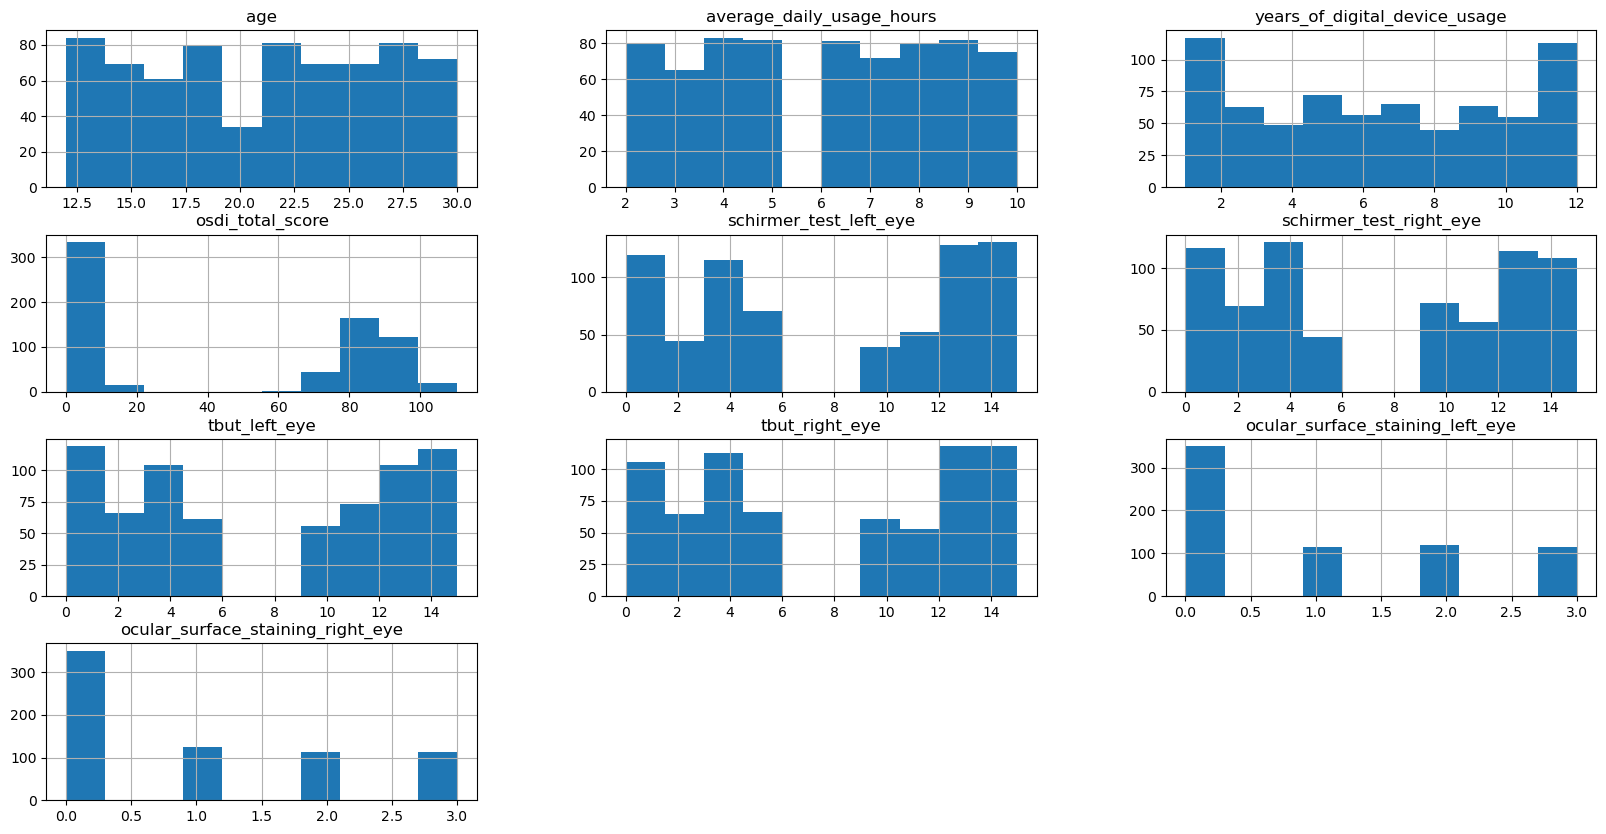

In [154]:
df.hist( figsize=[20,10])
plt.show()

In [155]:
df.groupby(['gender']).describe()

age                                                     \
        count       mean       std   min   25%   50%   75%   max   
gender                                                             
Female  352.0  21.147727  5.432916  12.0  17.0  21.0  26.0  30.0   
Male    348.0  20.824713  5.693494  12.0  16.0  21.0  26.0  30.0   

       average_daily_usage_hours                                          \
                           count      mean       std  min  25%  50%  75%   
gender                                                                     
Female                     352.0  6.082386  2.538934  2.0  4.0  6.0  8.0   
Male                       348.0  5.959770  2.598734  2.0  4.0  6.0  8.0   

             years_of_digital_device_usage                                     \
         max                         count      mean       std  min  25%  50%   
gender                                                                          
Female  10.0                         352.0  6.414773  3.529059  1.0  3.0  6.0   
Male    10.0                         348.0  6.433908  3.321175  1.0  4.0  6.0   

                   osdi_total_score                                      \
         75%   max            count       mean        std   min     25%   
gender                                                                    
Female  10.0  12.0            352.0  45.596496  40.672583  0.07  4.8750   
Male     9.0  12.0            348.0  46.804033  41.289665  0.17  6.4825   

                                      schirmer_test_left_eye            \
           50%        75%         max                  count      mean   
gender                                                                   
Female  65.625  85.416667  106.250000                  352.0  7.619318   
Male    11.955  87.500000  110.416667                  348.0  7.660920   

                                             schirmer_test_right_eye  \
             std  min  25%   50%   75%   max                   count   
gender                                                                 
Female  5.393092  0.0  3.0   5.0  13.0  15.0                   352.0   
Male    5.336511  0.0  3.0  10.0  13.0  15.0                   348.0   

                                                       tbut_left_eye  \
            mean       std  min  25%   50%   75%   max         count   
gender                                                                 
Female  7.332386  5.338702  0.0  2.0   5.0  12.0  15.0         352.0   
Male    7.459770  5.191557  0.0  2.0  10.0  12.0  15.0         348.0   

                                                       tbut_right_eye  \
            mean       std  min  25%   50%   75%   max          count   
gender                                                                  
Female  7.477273  5.355674  0.0  2.0   5.0  12.0  15.0          352.0   
Male    7.422414  5.235906  0.0  2.0  10.0  12.0  15.0          348.0   

                                                         \
            mean       std  min   25%   50%   75%   max   
gender                                                    
Female  7.465909  5.185337  0.0  2.75   5.0  12.0  15.0   
Male    7.643678  5.333224  0.0  3.00  10.0  13.0  15.0   

       ocular_surface_staining_left_eye                                     \
                                  count      mean       std  min  25%  50%   
gender                                                                       
Female                            352.0  1.045455  1.195043  0.0  0.0  1.0   
Male                              348.0  0.954023  1.109644  0.0  0.0  0.0   

                 ocular_surface_staining_right_eye                           \
        75%  max                             count      mean       std  min   
gender                                                                        
Female  2.0  3.0                             352.0  0.963068  1.120287  0.0   
Male    2.0  3.0                            

In [156]:
df.groupby(['ded_diagnosis']).describe()

age                                                     \
               count       mean       std   min   25%   50%   75%   max   
ded_diagnosis                                                             
No             350.0  21.134286  5.525323  12.0  16.0  21.0  26.0  30.0   
Yes            350.0  20.840000  5.603171  12.0  16.0  21.0  26.0  30.0   

              average_daily_usage_hours                                     \
                                  count      mean       std  min  25%  50%   
ded_diagnosis                                                                
No                                350.0  5.997143  2.568822  2.0  4.0  6.0   
Yes                               350.0  6.045714  2.570088  2.0  4.0  6.0   

                         years_of_digital_device_usage                      \
               75%   max                         count      mean       std   
ded_diagnosis                                                                
No             8.0  10.0                         350.0  6.428571  3.419024   
Yes            8.0  10.0                         350.0  6.420000  3.435555   

                                        osdi_total_score                       \
               min  25%  50%  75%   max            count       mean       std   
ded_diagnosis                                                                   
No             1.0  3.0  6.0  9.0  12.0            350.0   5.732914  3.520652   
Yes            1.0  3.0  6.0  9.0  12.0            350.0  86.660714  7.943826   

                                                                 \
                 min      25%        50%        75%         max   
ded_diagnosis                                                     
No              0.07   2.3725   5.735000   8.827500   12.000000   
Yes            62.50  81.2500  85.416667  91.666667  110.416667   

              schirmer_test_left_eye                                           \
                               count   mean       std   min   25%   50%   75%   
ded_diagnosis                                                                   
No                             350.0  12.72  1.618801  10.0  11.0  13.0  14.0   
Yes                            350.0   2.56  1.785199   0.0   1.0   3.0   4.0   

                    schirmer_test_right_eye                                   \
                max                   count       mean       std   min   25%   
ded_diagnosis                                                                  
No             15.0                   350.0  12.365714  1.773078  10.0  11.0   
Yes             5.0                   350.0   2.425714  1.668492   0.0   1.0   

                                tbut_left_eye                             \
                50%   75%   max         count       mean       std   min   
ded_diagnosis                                                              
No             12.0  14.0  15.0         350.0  12.451429  1.718494  10.0   
Yes             2.0   4.0   5.0         350.0   2.448571  1.726728   0.0   

                                      tbut_right_eye                       \
                25%   50%   75%   max          count       mean       std   
ded_diagnosis                                                               
No             11.0  12.0  14.0  15.0          350.0  12.517143  1.725751   
Yes             1.0   2.0   4.0   5.0          350.0   2.591429  1.720077   

                                            ocular_surface_staining_left_eye  \
                min   25%   50%   75%   max                            count   
ded_diagnosis                                                                  
No             10.0  11.0  13.0  14.0  15.0                            350.0   
Yes             0.0   1.0   3.0   4.0   5.0                            350.0   

                                                       \
              mean       std  min  25%  50%  75%  max   
ded_diagnosis               

### pairplot

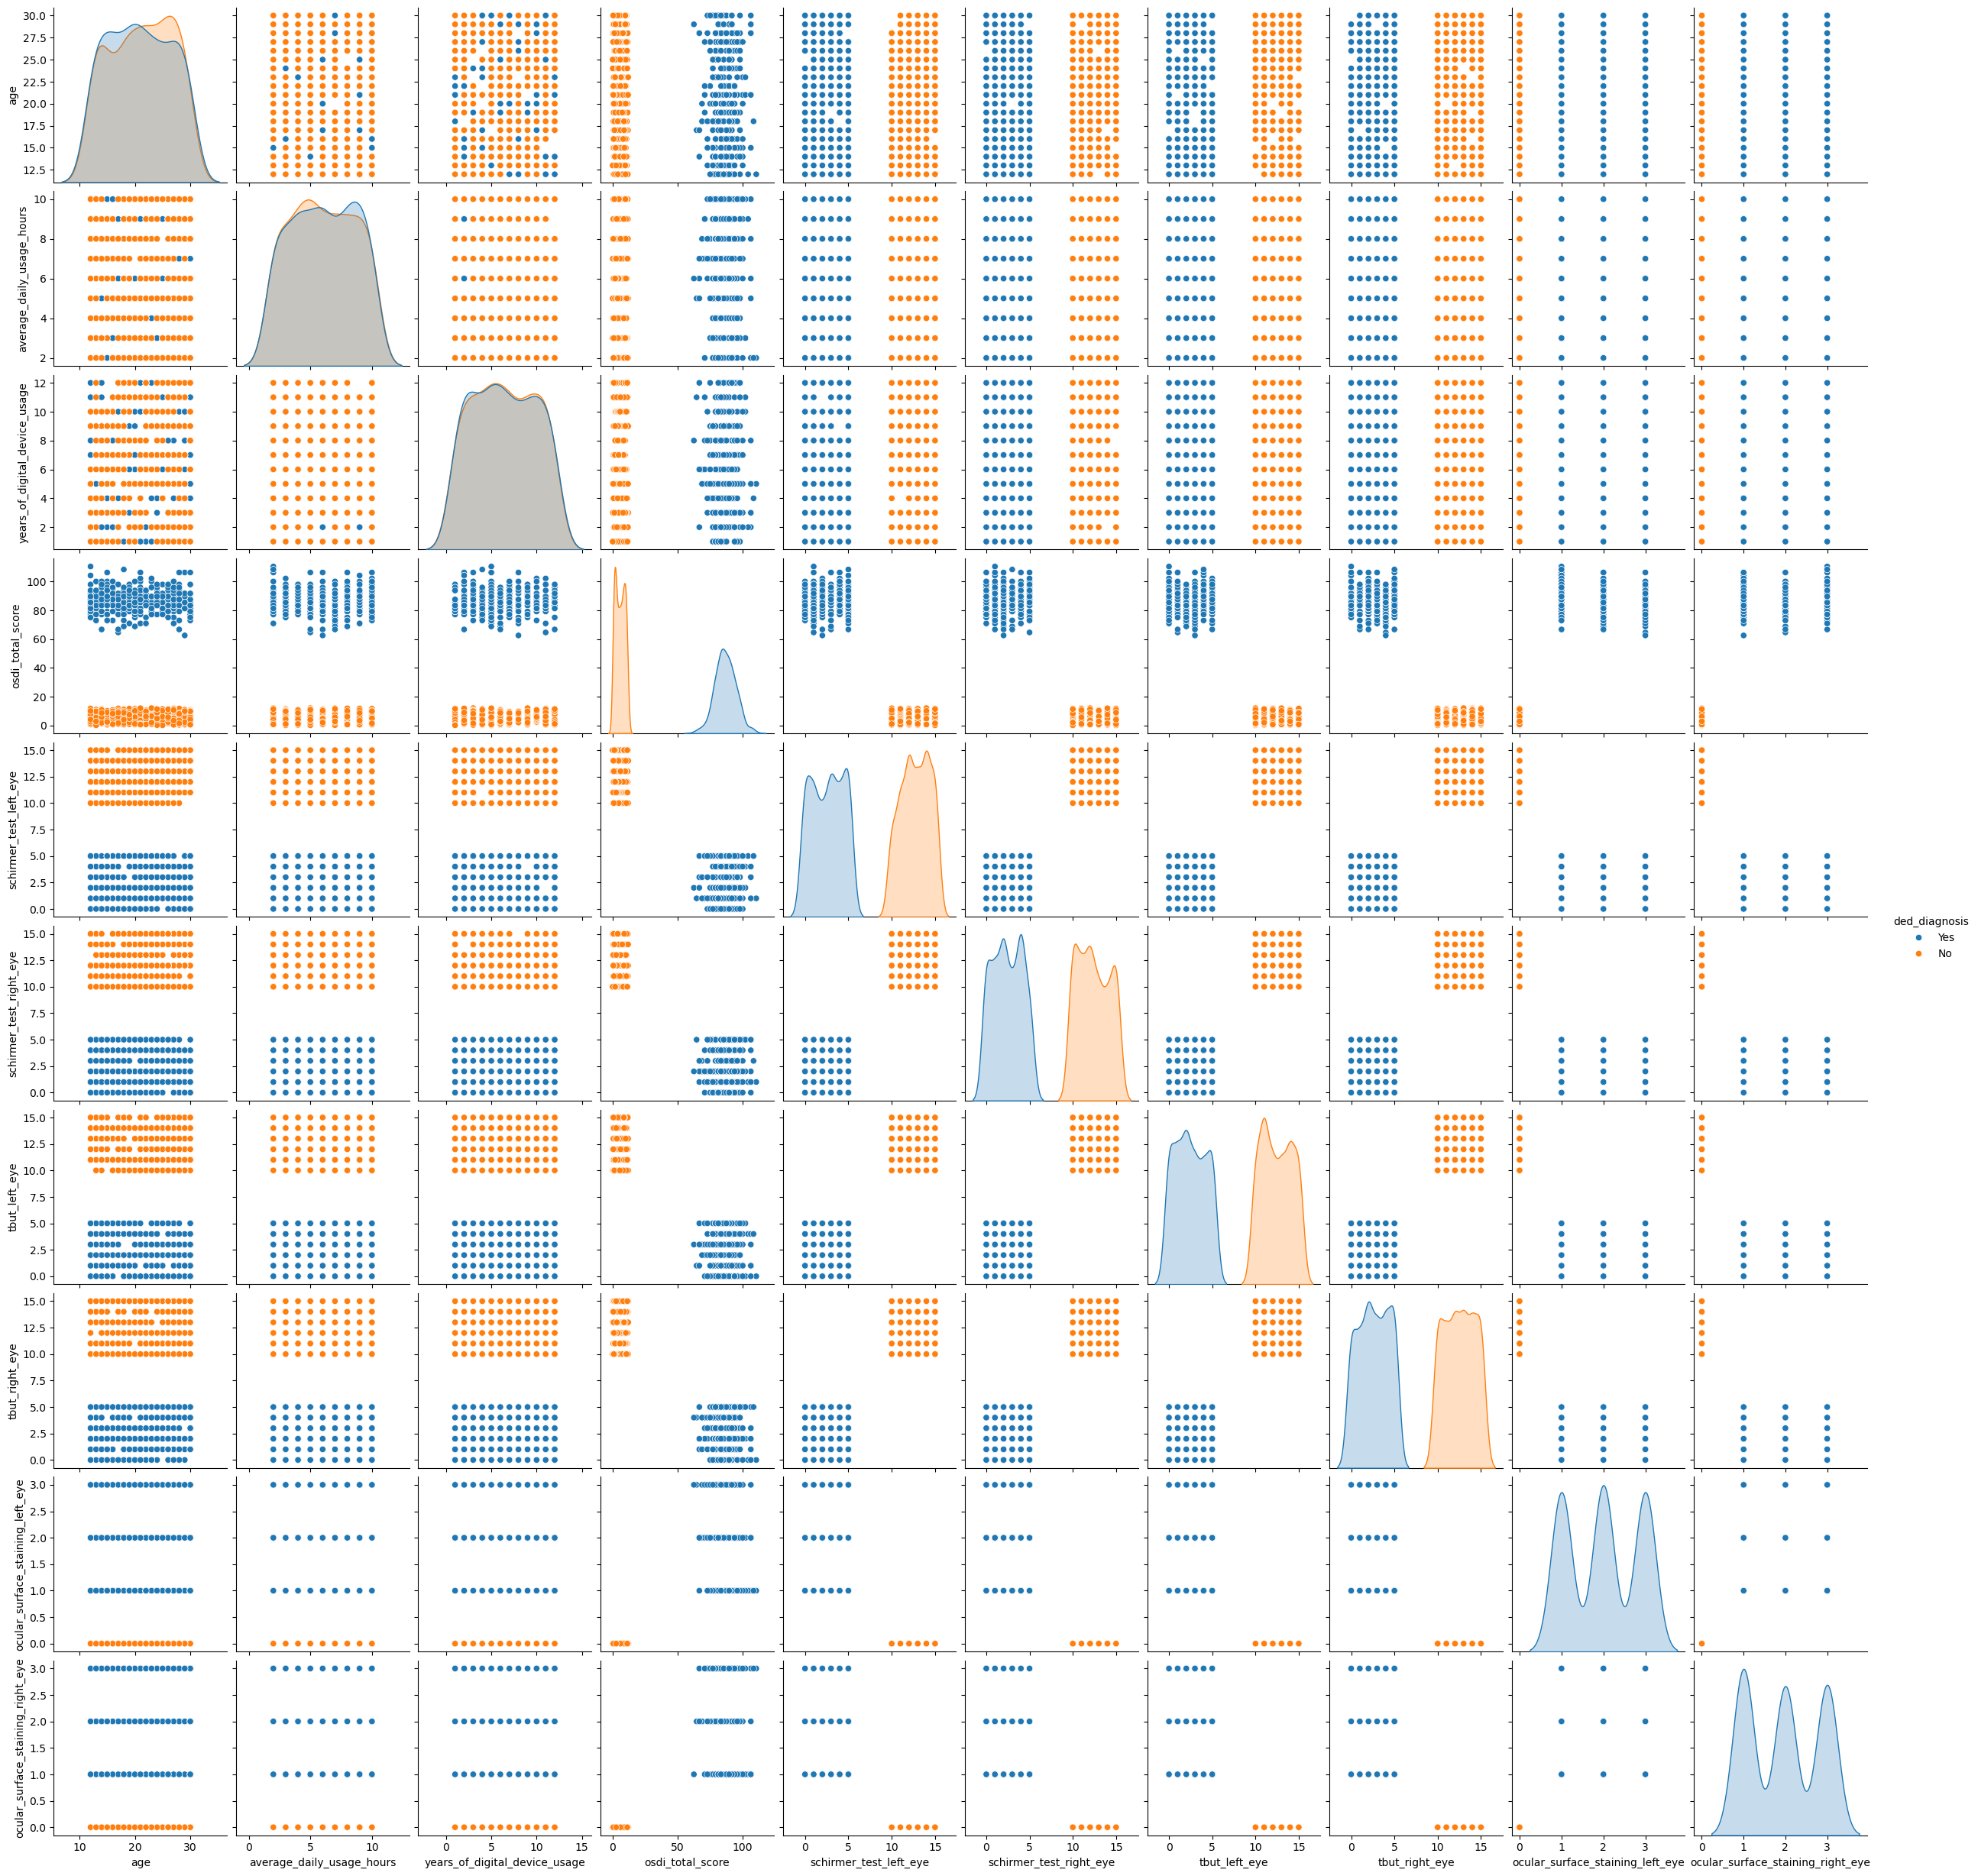

In [157]:
sns.pairplot(df, hue='ded_diagnosis', diag_kind='kde' )

### corr()

<Axes: >

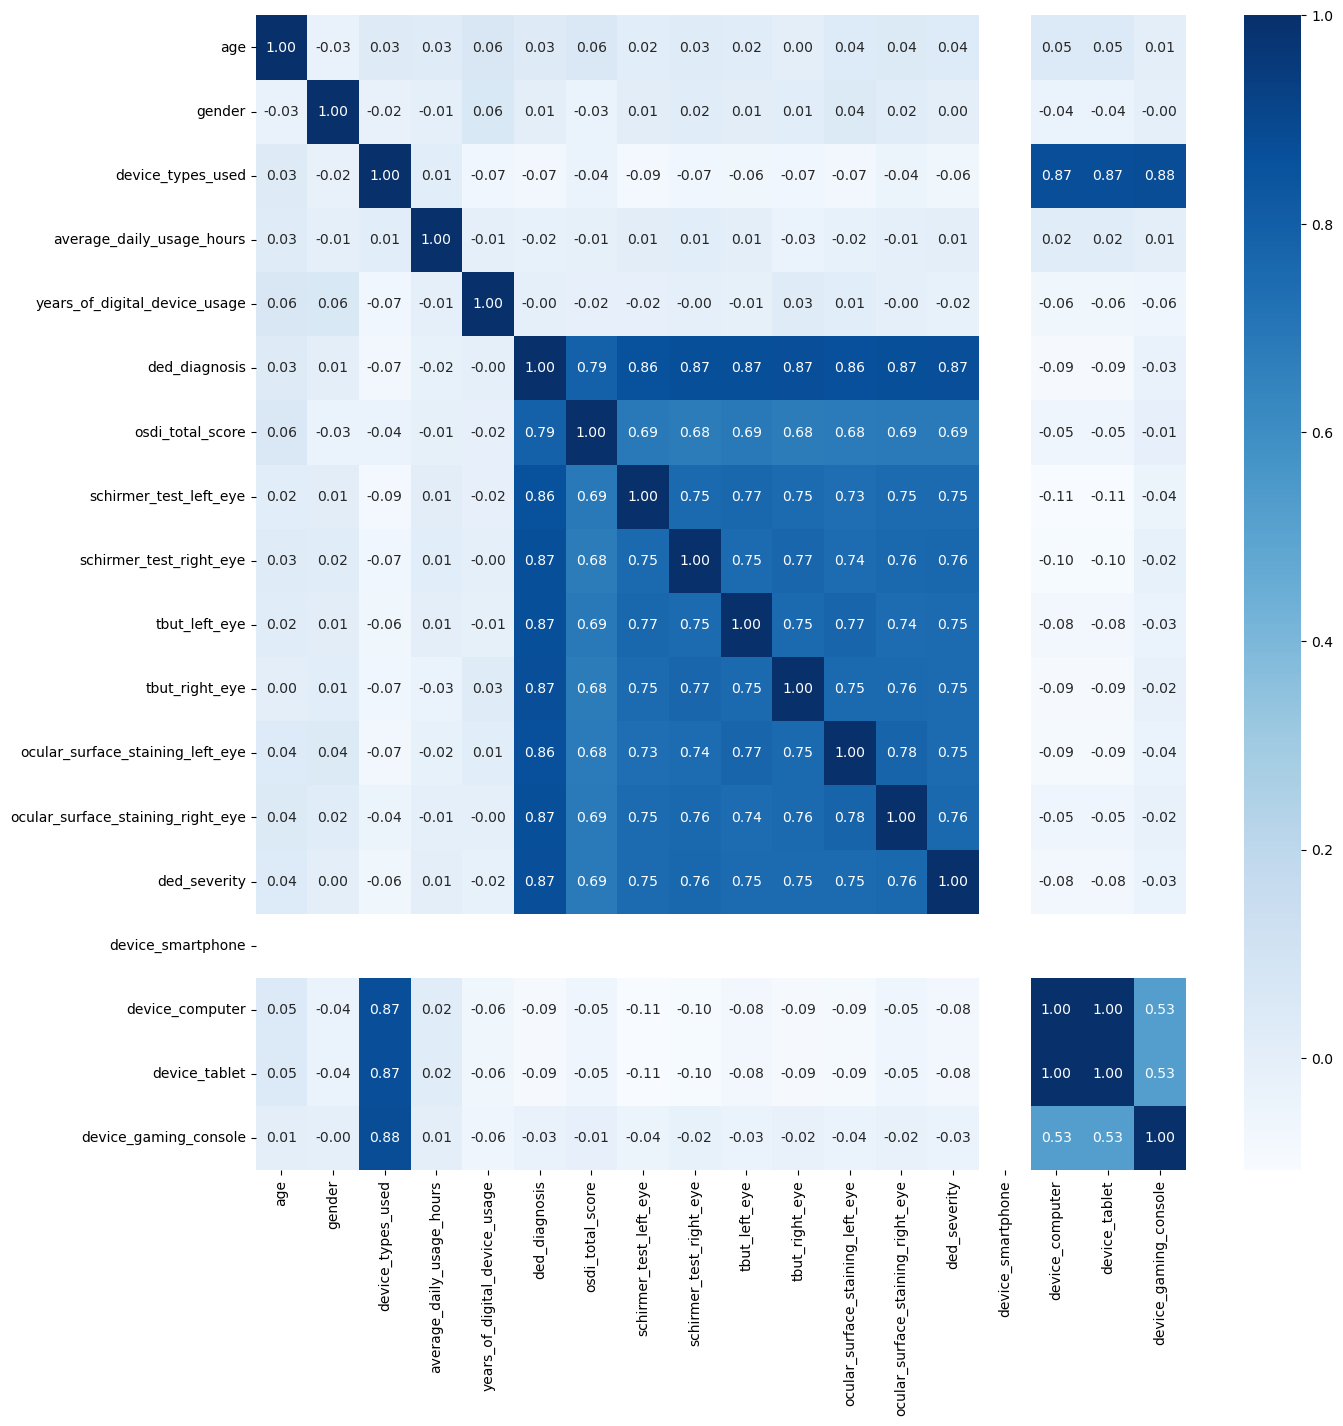

In [158]:
plt.figure(figsize=[15,15])
sns.heatmap(df.apply(lambda x : pd.factorize(x)[0]).corr(), cmap='Blues', annot=True , fmt='0.2f')

#### Observation :

**Columns :** 'ded_diagnosis', 'osdi_total_score', 'schirmer_test_left_eye', 'schirmer_test_right_eye', 'tbut_left_eye', 'tbut_right_eye', 'ocular_surface_staining_left_eye', 'ocular_surface_staining_right_eye', 'ded_severity'

- All these columns are higly correlated with each other.



<Axes: >

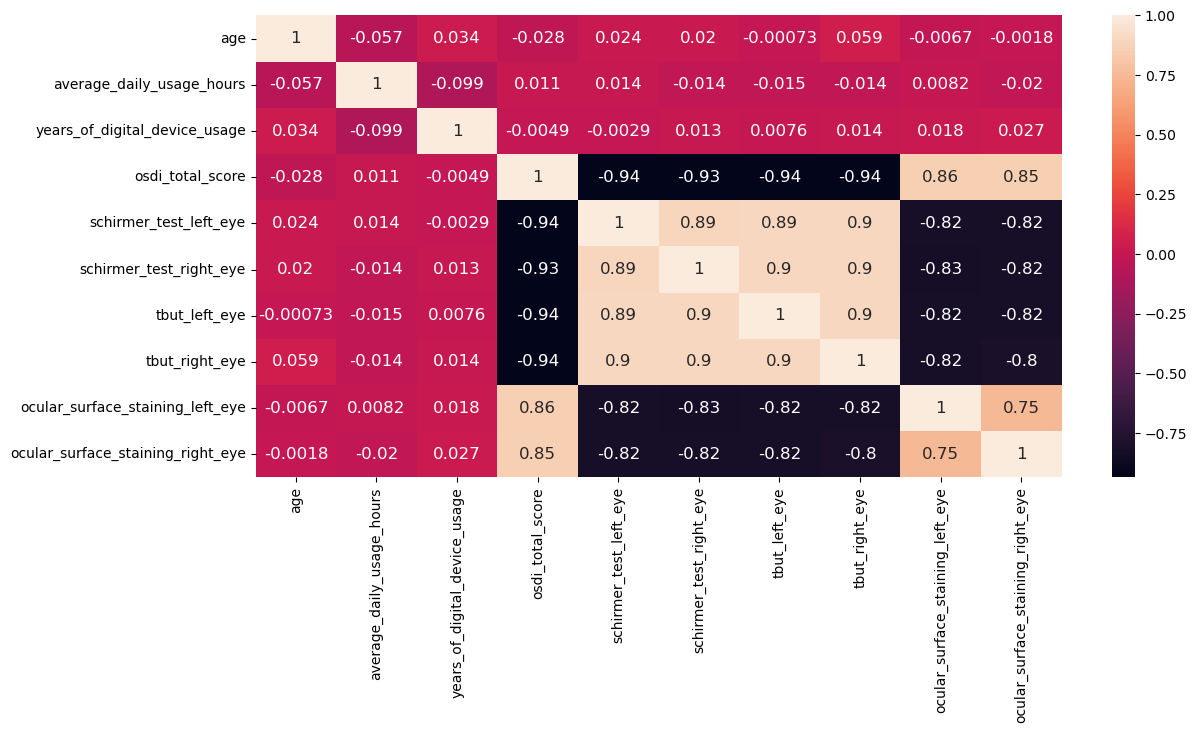

In [159]:
plt.figure(figsize=[13,6])

sns.heatmap(df.select_dtypes(exclude='O').corr(), annot=True, annot_kws={'size': 12}  )

#### Observation :

**Columns :** osdi_total_score , schirmer_test_left_eye, schirmer_test_right_eye, tbut_left_eye, tbut_right_eye, ocular_surface_staining_left_eye, ocular_surface_staining_right_eye
-  Are highly correlated with each other.

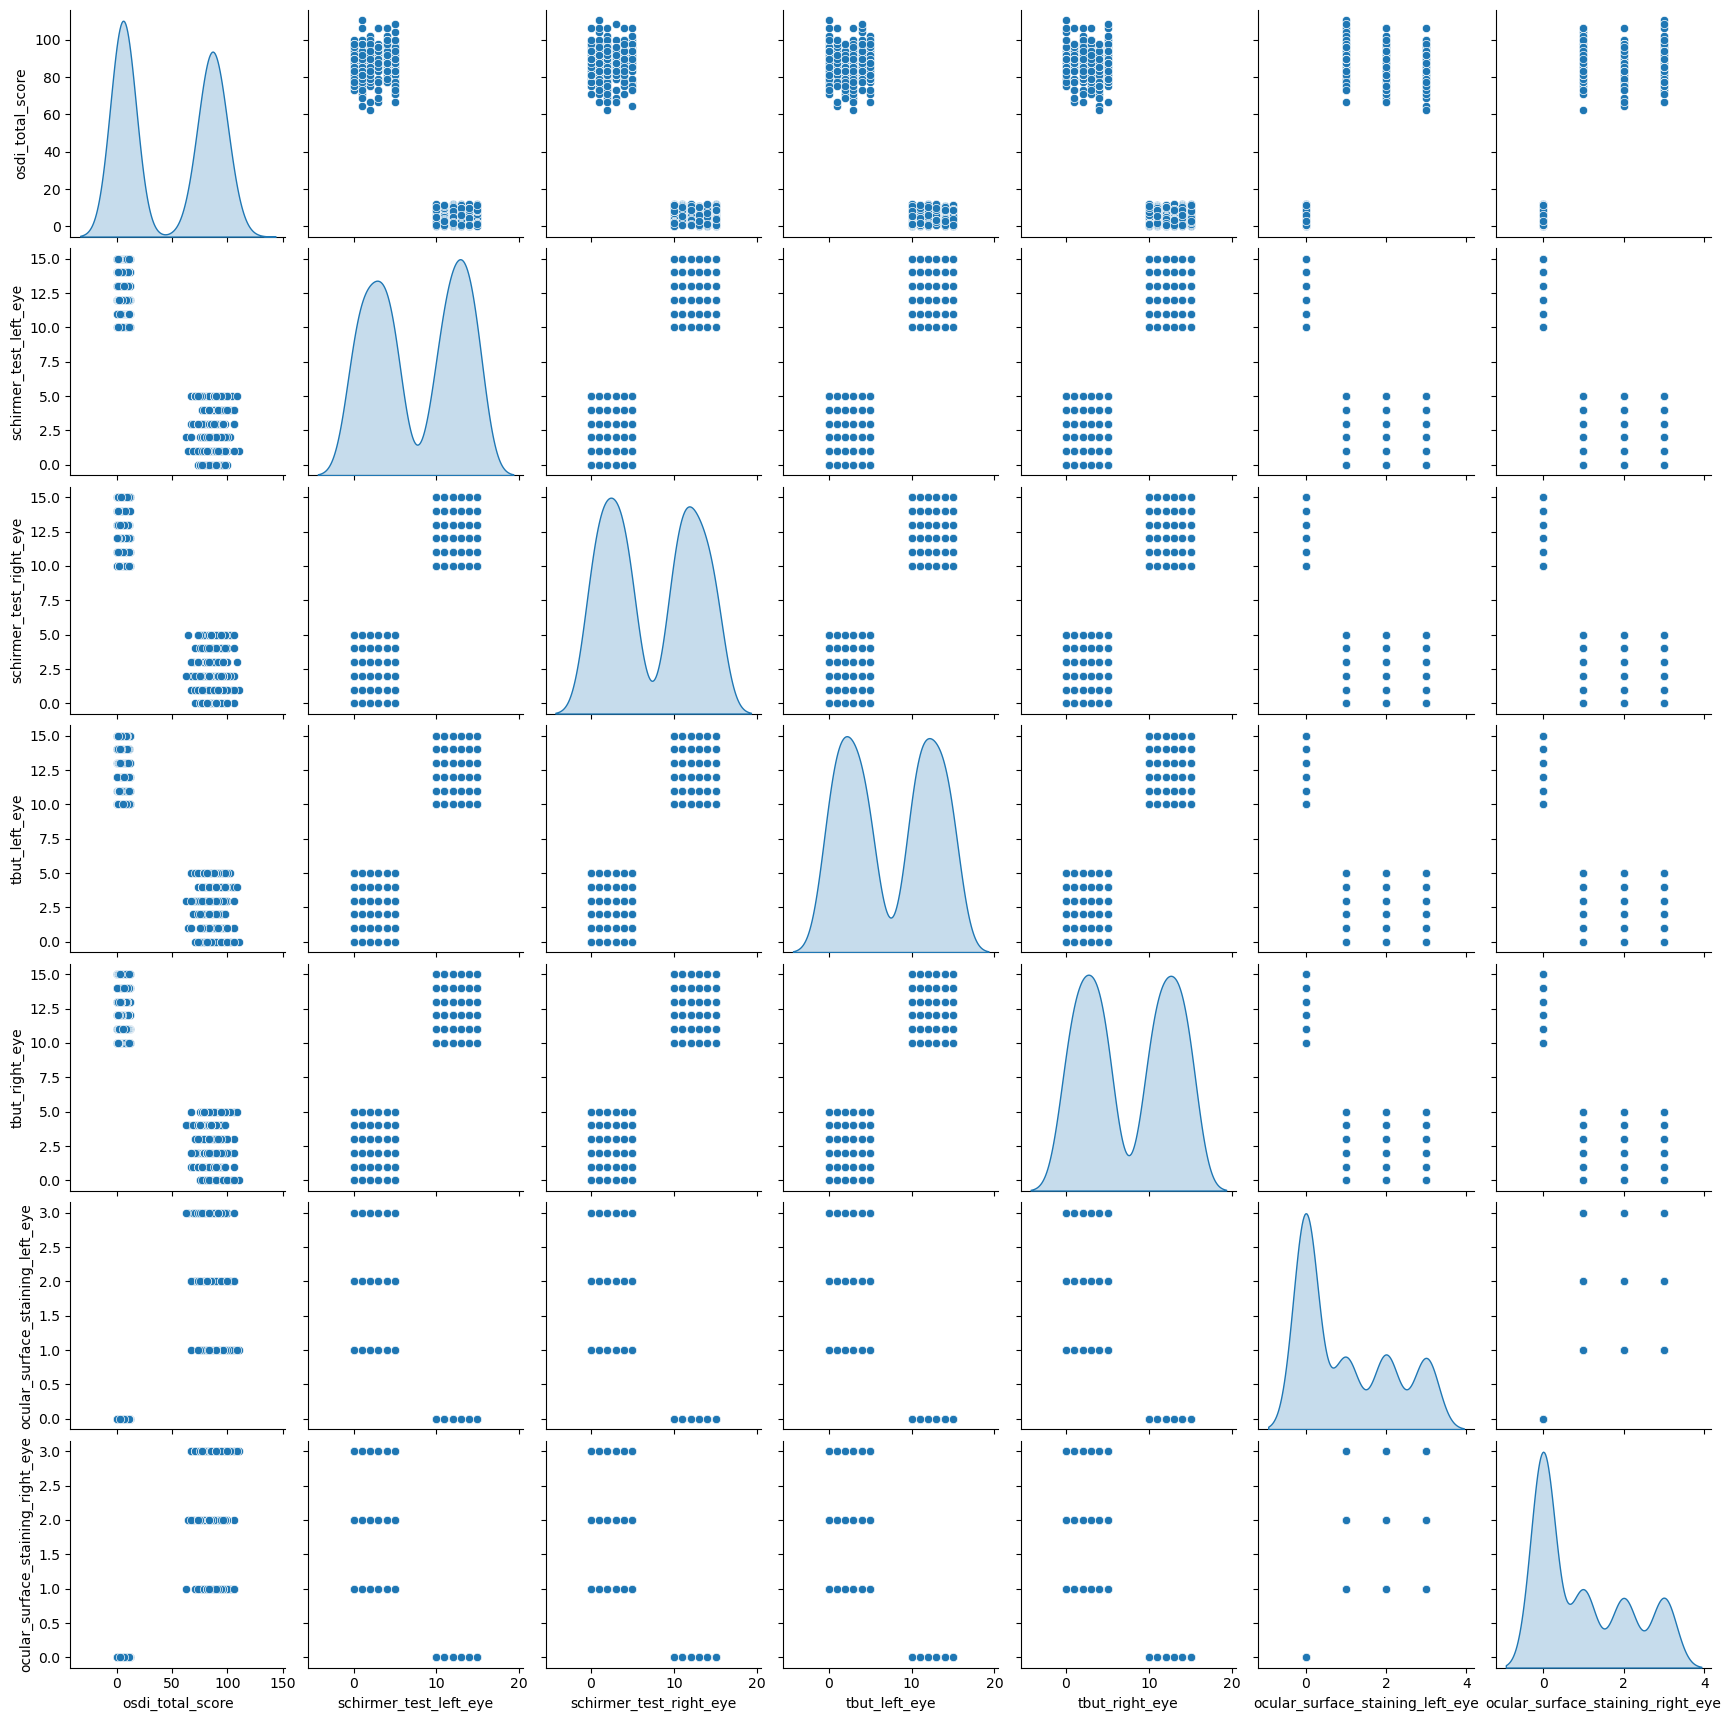

In [160]:
sns.pairplot(df.loc[:,'osdi_total_score':'ded_severity'] ,  kind='scatter', diag_kind='kde', corner=False )


### OSDI score - schirmer test - ocular test - tbut test (Right, Left)

In [161]:
columns = ['osdi_total_score', 'schirmer_test_left_eye', 'schirmer_test_right_eye', 'tbut_left_eye',
       'tbut_right_eye', 'ocular_surface_staining_left_eye', 'ocular_surface_staining_right_eye']

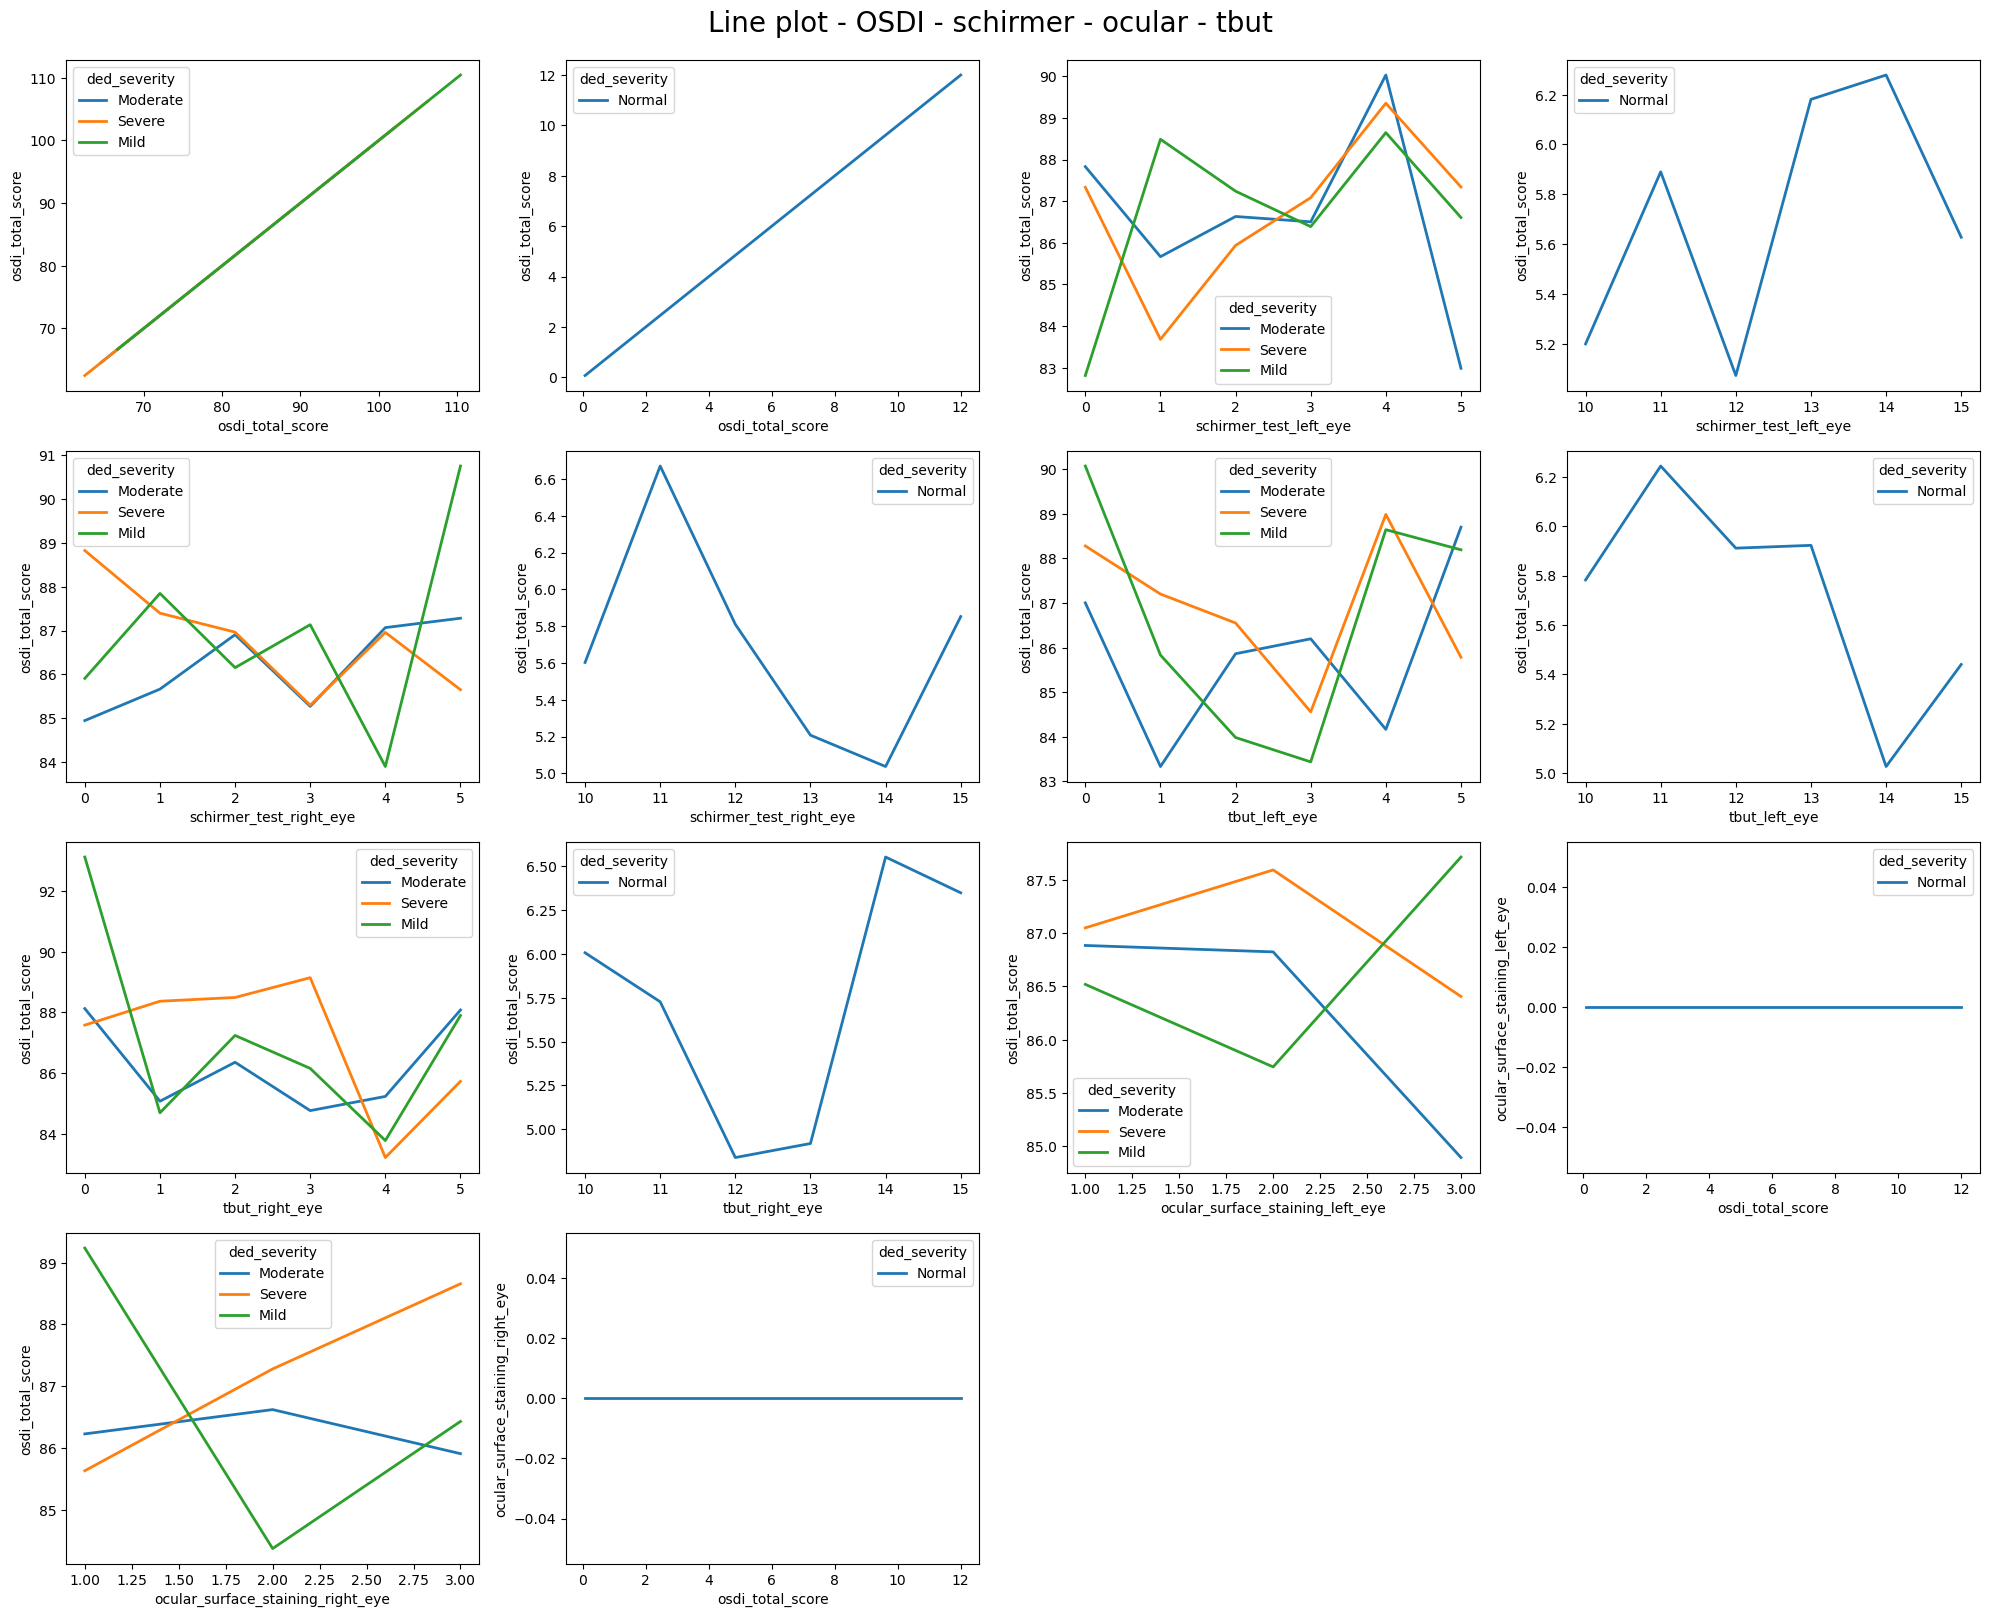

In [162]:
plt.figure(figsize=[20,20])
i=1

for column in columns:
    
    plt.subplot(5,4,i)
    sns.lineplot(data=df[df['ded_severity'] != 'Normal'], y='osdi_total_score', x=df[df['ded_severity'] != 'Normal'][column] ,
                     hue= 'ded_severity' , linewidth=2 ,  err_style=None )

    i+=1
    if ( (column != 'ocular_surface_staining_left_eye') & 
        (column != 'ocular_surface_staining_right_eye') & 
        (column != 'ded_severity')
       ):
        plt.subplot(5,4,i)
        sns.lineplot(data=df[df['ded_severity'] == 'Normal'], y='osdi_total_score', x=df[df['ded_severity'] == 'Normal'][column]  , hue= 'ded_severity' ,
                linewidth=2 ,  err_style=None )
    else : 
        plt.subplot(5,4,i)
        sns.lineplot(data=df[df['ded_severity'] == 'Normal'], x='osdi_total_score', y=df[df['ded_severity'] == 'Normal'][column]  , hue= 'ded_severity' ,
                linewidth=2 ,  err_style=None)
        
    i+=1

plt.suptitle('Line plot - OSDI - schirmer - ocular - tbut \n', size=20)
plt.tight_layout()
plt.show()

 

#### Observation :

- Relationship: The line plot shows the changes in the continuous data (y) with respect to the categorical variable (x).
- Trend: There is no simple upward or downward trend; rather, the values fluctuate.

## Conclusion :

 
**Age :**
- Similar Age distribution between DED & NON DED
- Individuals with age <20 are facing DED in more number when compared to age > 20

**Gender :**
- Similar chances to both Females and Males to get DED 
- Even the severity level is similar. But there’s only less difference.
  - Females have more chances of getting Mild, Moderate severity level.
  - Males have high changes of Severe Severity level.

**Device types Used :**
- Individuals using (Gaming console, Smartphone, tablet), (Tablet, Smartphone) have more chances of DED. Less chances of DED for computer users.
- More chance of DED Severity level : SEVERE, MODERATE

**Average daily usage hours :**
- There is no proper relation between hour of usage and DED severity level. There is equal chance to every average hour.
- DED severity : There is equal chance to all severity levels

**Years of digital device usage :**
- There is non proper correlation between years of digital device usage and DED severity.
- DED severity : There is equal chance to all severity levels

**OSDI total score :**

- OSDI score between 0 - 20 : NON DED
- OSDI score between 60 - 100 : DED 

There is equal chance to all severity levels
- When OSDI `Score > 85` severity levels = Moderate, Severe
- Female are more likely to get `moderate` and `mild` severity when OSDI score is < 80
- Where as Males get SEVERE severity level, when OSDI score is > 80

**Schirmer Test  TBUT Test (Left & Right Eye) :**

- Schirmer's score between 0 - 5 : DED
- schirmer's score between 10 - 15 : NON DED
+ TBUT Test score between 0 - 5 : DED 
+ TBUT Test score between 10 - 15 : NON DED

There is no exact correlation between TEST score and Severity Level.

**Schirmer test left eye & TBUT Test right eye :**

- More chances of severe severity level when score is 4,5
- Average Values for DED are close to each other.

**Schirmer test right eye & TBUT Test left eye :**

- More chances of Severe severity level when score is 0,1 
- Average Values for DED are close to each other.

**Ocular surface staining Left & Right Eye :**

- If  ocular surface staining score = 0, then severity level is ‘Normal’ 

Left eye :
- If ocular surface left eye score = 2 , more chance of Severe severity level
- If ocular surface left eye score = 1 , more chance of Moderate severity level

Right Eye :
- If ocular surface right eye score = 1 , more chance of Severe severity level
- All other severity levels have equal chances.

**Higly Correlated Columns :** 

DED Diagnosis, OSDI total score, Schirmer Test Left Eye, Schirmer Test Right Eye, TBUT left eye, TBUT right eye, Ocular Surface Staining Left Eye, Ocular Surface Staining Right Eye, DED severity. All these columns are highly correlated with each other


